- NVDA Nvidia Corp and AMD Advanced Micro Devices Inc -> Technology Sector
- Exxon Mobil (NYSE:XOM) and Chevron (NYSE:CVX) -> Energy Sector
- Johnson & Johnson (NYSE:JNJ) and Pfizer (NYSE:PFE) -> Health Care Sector

### 1) Sommario dati utilizzati

Importo le librerie necessarie per l'analisi dei dati e per la visualizzazione dei grafici.

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.dates as mdates
import seaborn as sns
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [3]:
start_date = '2012-11-30'
end_date = '2022-11-30'

dataframe_complete= yf.download(['NVDA','AMD','XOM','CVX','JNJ','PFE'], start_date, end_date)
#dataframe_complete= dataframe_complete.replace(np.nan, 0)

[*********************100%***********************]  6 of 6 completed


Creazione del dataframe delle adjusted close price.

In [4]:
dataframe=dataframe_complete['Adj Close']
#dataframe = pd.DataFrame({'NVDA': NVDA['Adj Close'], 'AMD': AMD['Adj Close'], 'XOM': XOM['Adj Close'], 'CVX': CVX['Adj Close'], 'JNJ': JNJ['Adj Close'], 'PFE': PFE['Adj Close']}) # create a dataframe with the adjusted close prices of the stocks
#dataframe = dataframe.dropna() # drop rows with missing values
dataframe


,AMD,CVX,JNJ,NVDA,PFE,XOM
Date,,,,,,
2012-11-30,2.200000,69.891800,53.113258,2.764091,16.596138,57.710148
2012-12-03,2.360000,69.210701,53.052338,2.713290,16.642567,57.363152
2012-12-04,2.260000,68.747787,53.212292,2.794111,16.695629,57.088131
2012-12-05,2.290000,69.547935,53.296070,2.761783,17.007389,57.441700
2012-12-06,2.340000,70.394394,53.357014,2.766402,16.987492,57.618500
...,...,...,...,...,...,...
2022-11-22,75.250000,185.889999,176.820007,160.338989,49.080002,114.180000
2022-11-23,76.400002,184.240005,177.009995,165.147751,48.849998,113.610001
2022-11-25,75.139999,183.699997,177.240005,162.658386,49.209999,113.209999


<AxesSubplot: title={'center': 'Prezzi chiusura azioni'}, xlabel='Data', ylabel='Prezzo chiusura'>

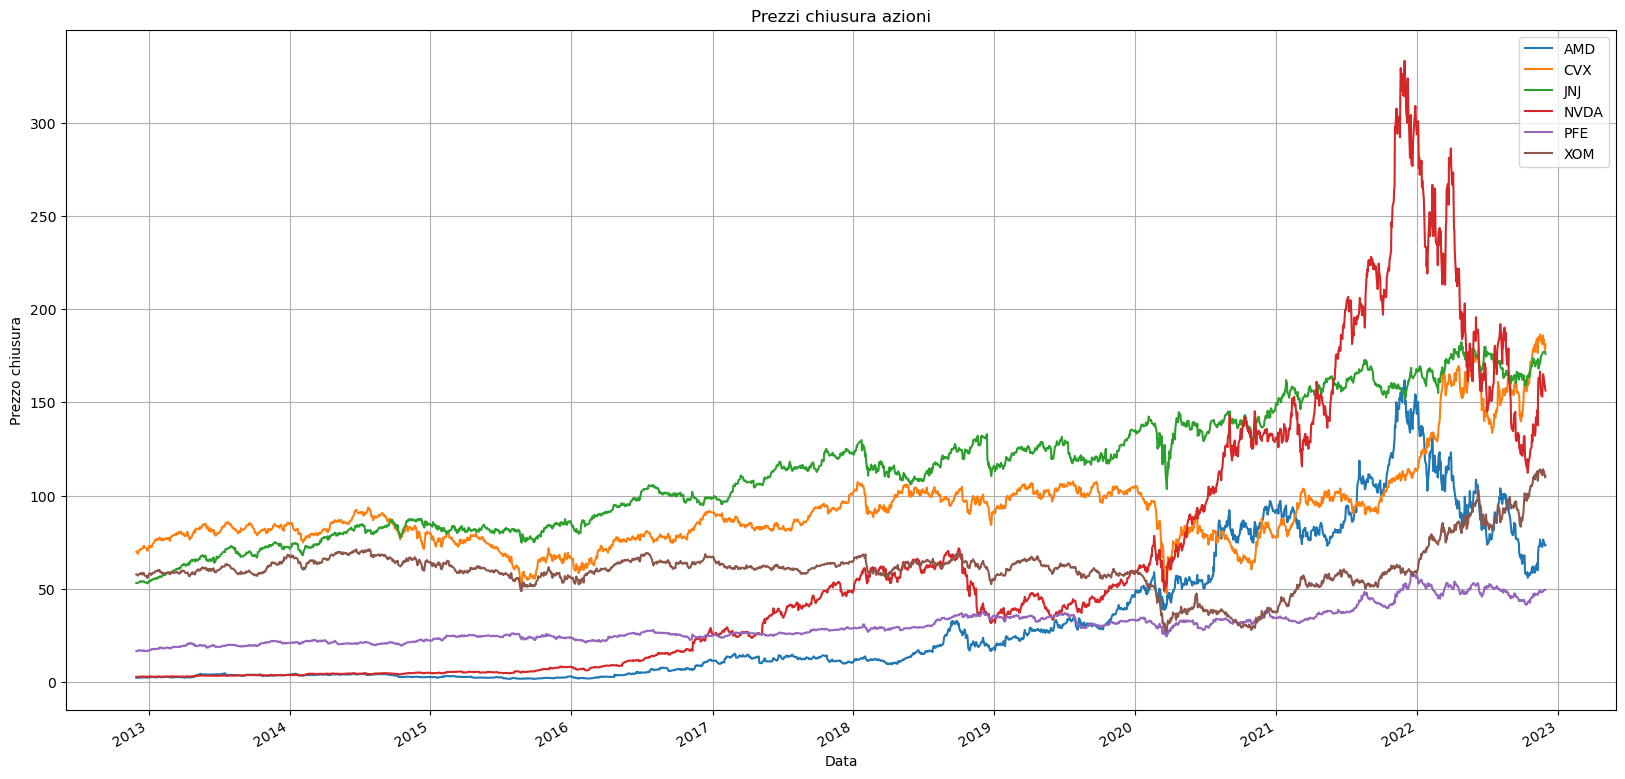

In [5]:
dataframe.plot(figsize=(20, 10), grid=True, title='Prezzi chiusura azioni', xlabel='Data', ylabel='Prezzo chiusura')

### 2) Statistiche descrittive

Rendimento cumulato giornaliero e durante il periodo di analisi

<AxesSubplot: title={'center': 'Rendimento cumulato'}, xlabel='Date', ylabel='Rendimento cumulato (%)'>

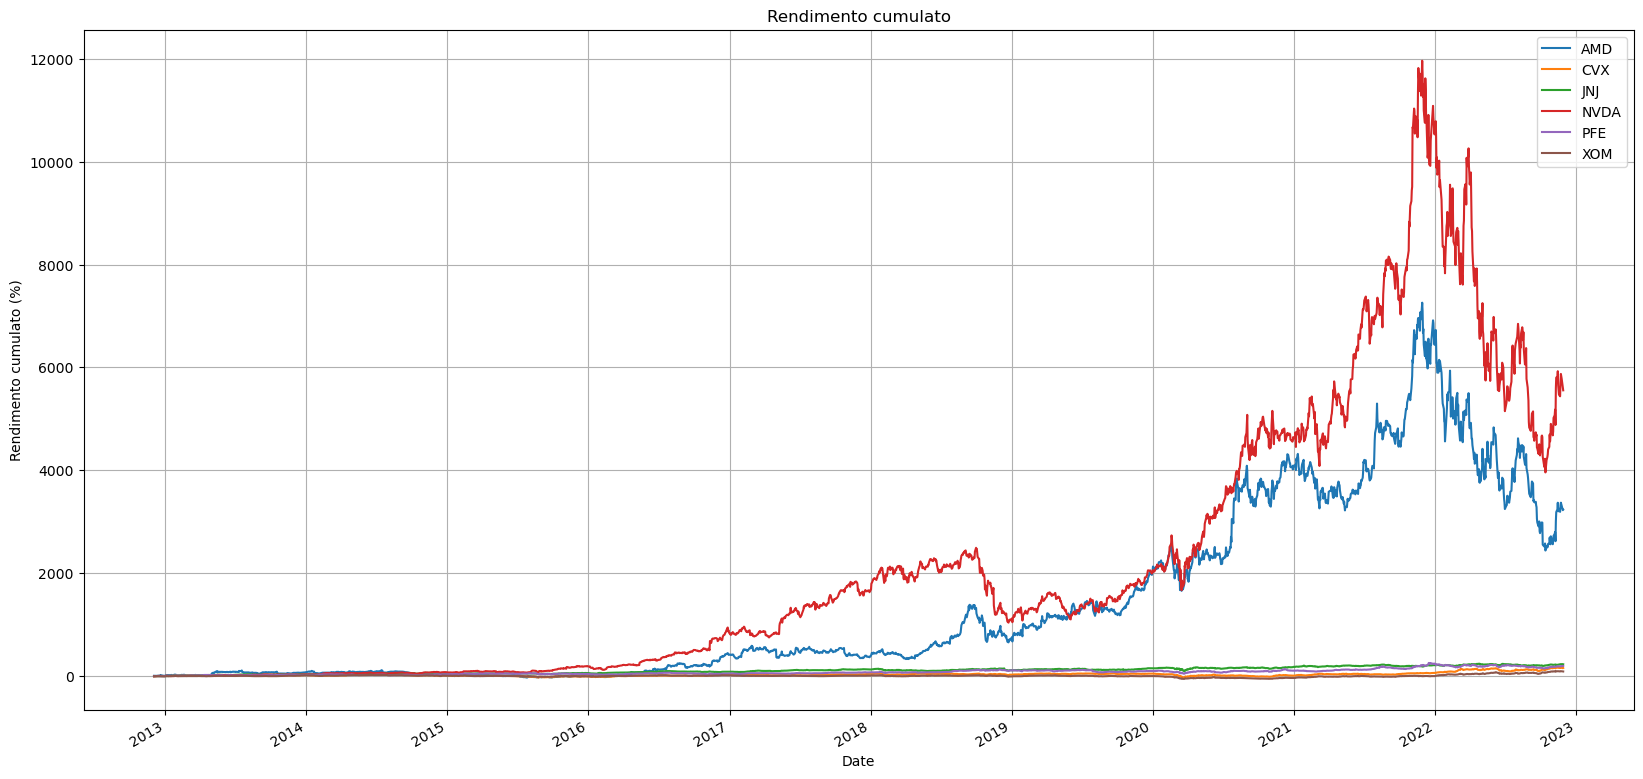

In [6]:
# Calcolo rendimento cumulato
rendimento_cumulato= ((1 +dataframe.pct_change()).cumprod()-1)*100
rendimento_cumulato.plot(figsize=(20, 10), grid=True, title='Rendimento cumulato', ylabel='Rendimento cumulato (%)')


In [7]:
ritorno_cumulato_periodo = rendimento_cumulato.iloc[:, 0:].tail(1) #ritorno cumulato su tutto il periodo (%)
ritorno_cumulato_periodo

,AMD,CVX,JNJ,NVDA,PFE,XOM
Date,,,,,,
2022-11-29,3235.908991,159.014647,231.536798,5556.470004,198.201917,91.543437


Rendimento composto annuo

In [8]:
rendimento_composto_annuo= (pow((dataframe.tail(1).iloc[0]/dataframe.head(1).iloc[0]), (1/10))-1)*100 #rendimento composto annuo (%)
print(rendimento_composto_annuo)

AMD     42.010815
CVX      9.984740
JNJ     12.733548
NVDA    49.711289
PFE     11.545240
XOM      6.715309
dtype: float64


Rendimento logaritmico annuo

array([[<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
        <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
        <AxesSubplot: xlabel='Date'>]], dtype=object)

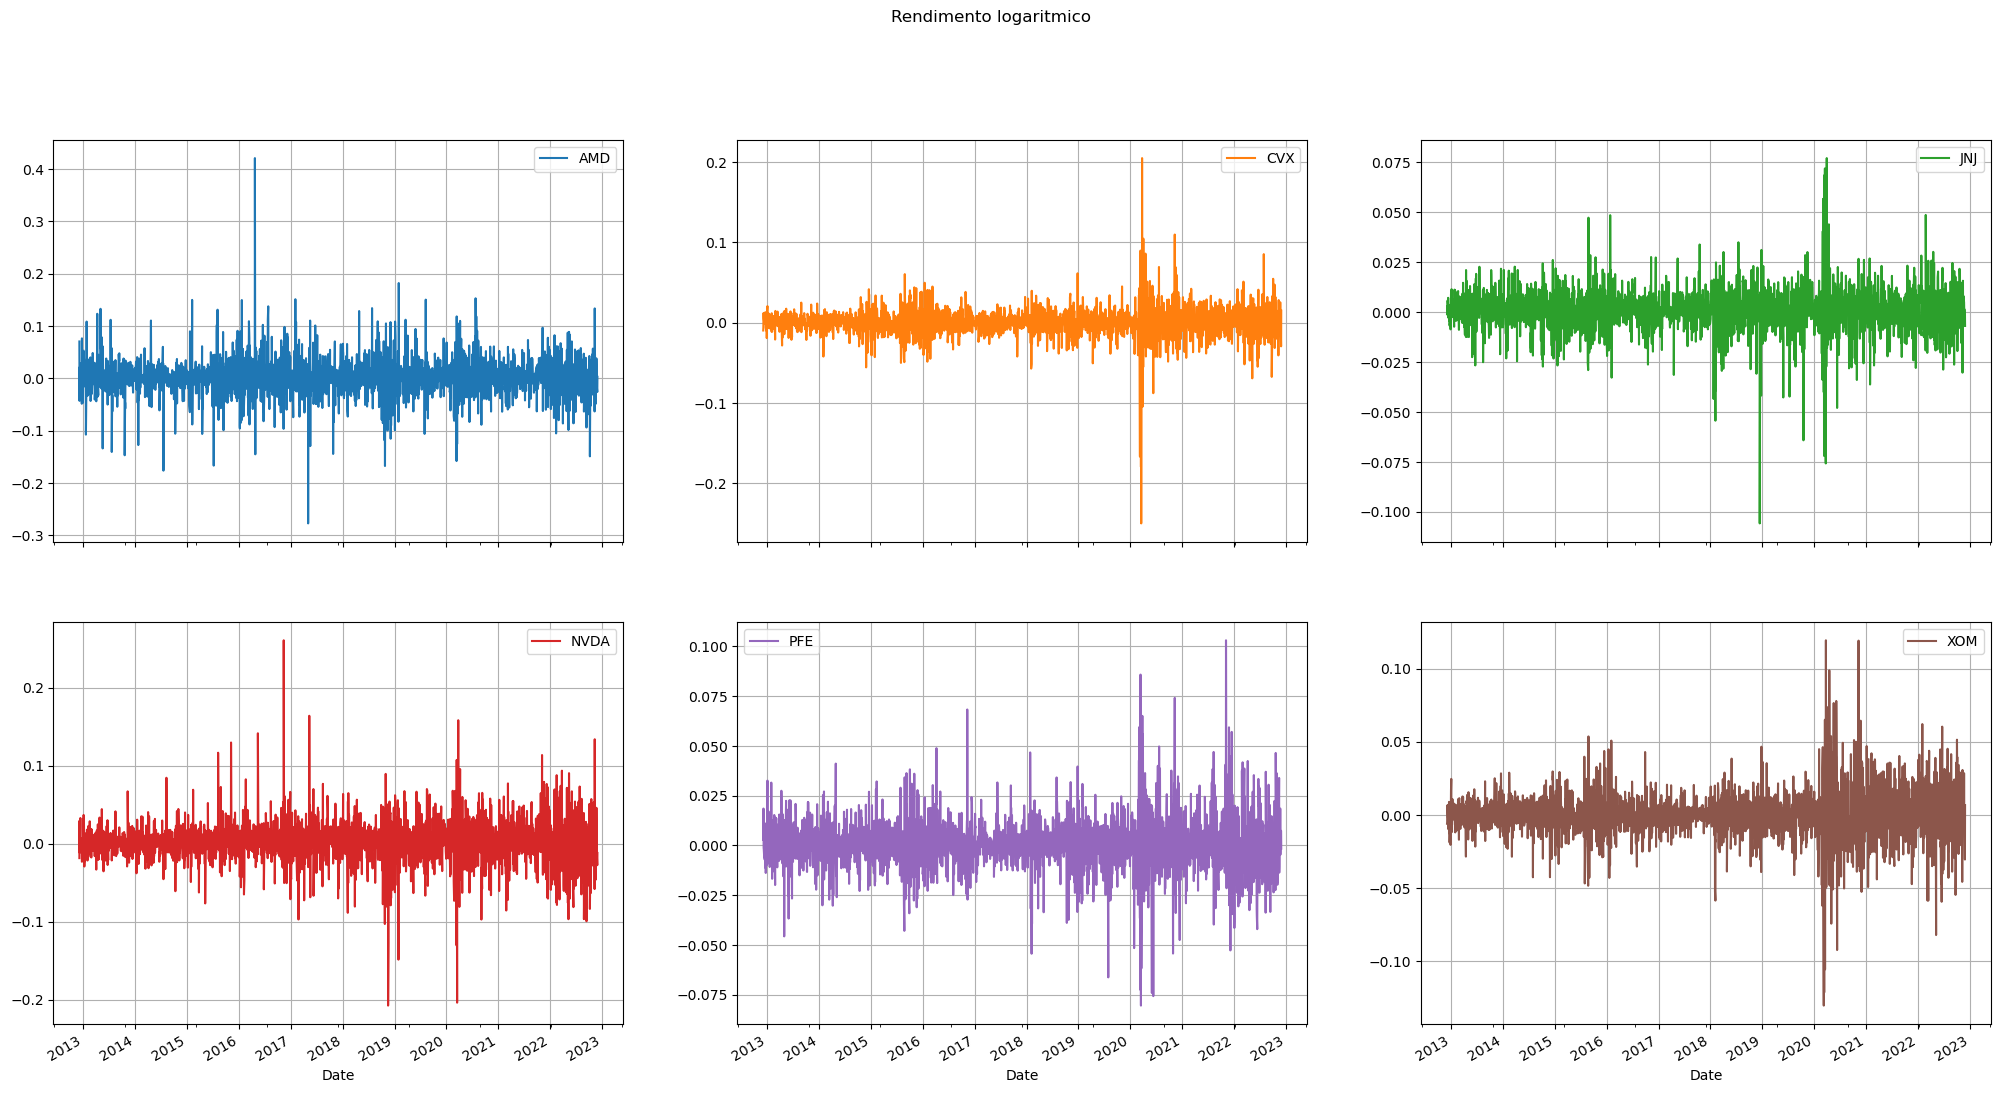

In [9]:
dataframe_mensile=dataframe.groupby(pd.Grouper(freq='M')).mean()
rendimento_logaritmico_annuo = np.log(dataframe/dataframe.shift(1)).dropna() #rendimento logaritmico annuo
rendimento_logaritmico_annuo.plot(figsize=(25, 13), grid=True, title='Rendimento logaritmico', subplots=True, layout=(2, 3))

Rendimento semplice annuo

array([[<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
        <AxesSubplot: xlabel='Date'>],
       [<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
        <AxesSubplot: xlabel='Date'>]], dtype=object)

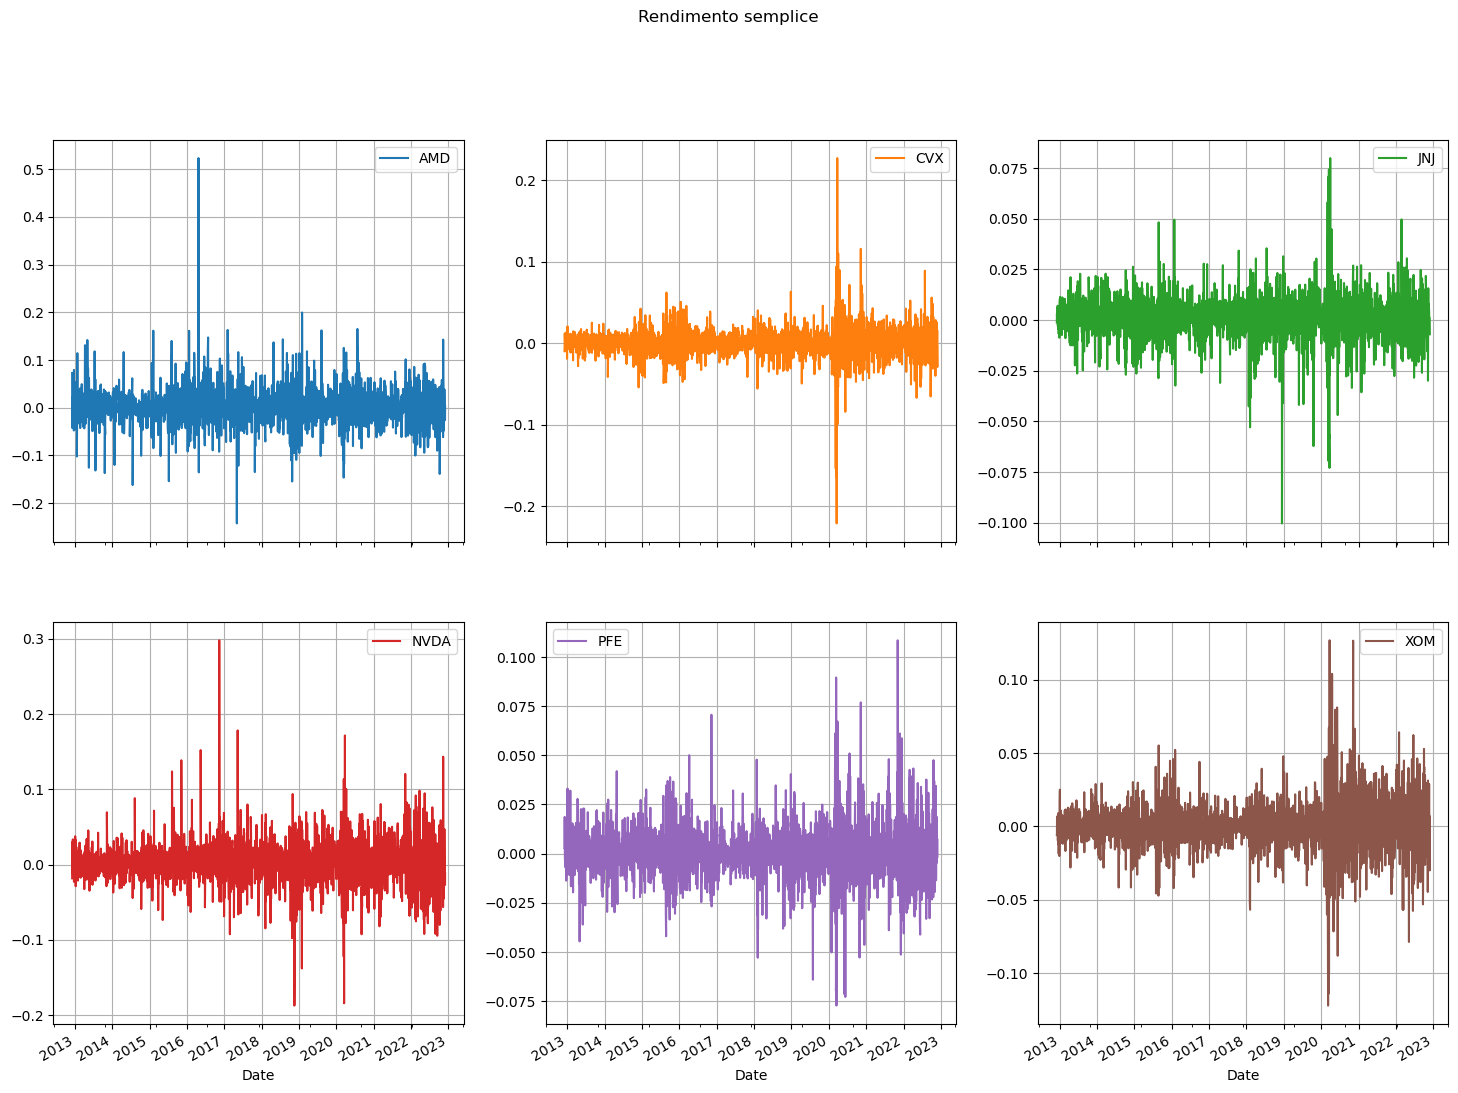

In [10]:
#rendimento_lordo_periodo = (dataframe.loc["2022-11-29"] - dataframe.loc ["2019-12-02"]) / dataframe.loc ["2019-12-02"] #rendimento lordo periodo
#print(rendimento_lordo_periodo)

rendimento_semplice= dataframe.pct_change() #rendimento semplice
rendimento_semplice.plot(figsize=(18, 13), grid=True, title='Rendimento semplice', subplots=True, layout=(2, 3))



#rendimento_netto_periodo = rendimento_lordo_periodo - rendimento_lordo_periodo*0.005 #rendimento netto periodo
#print(rendimento_netto_periodo)

Istogramma dei rendimenti e la loro distribuzione

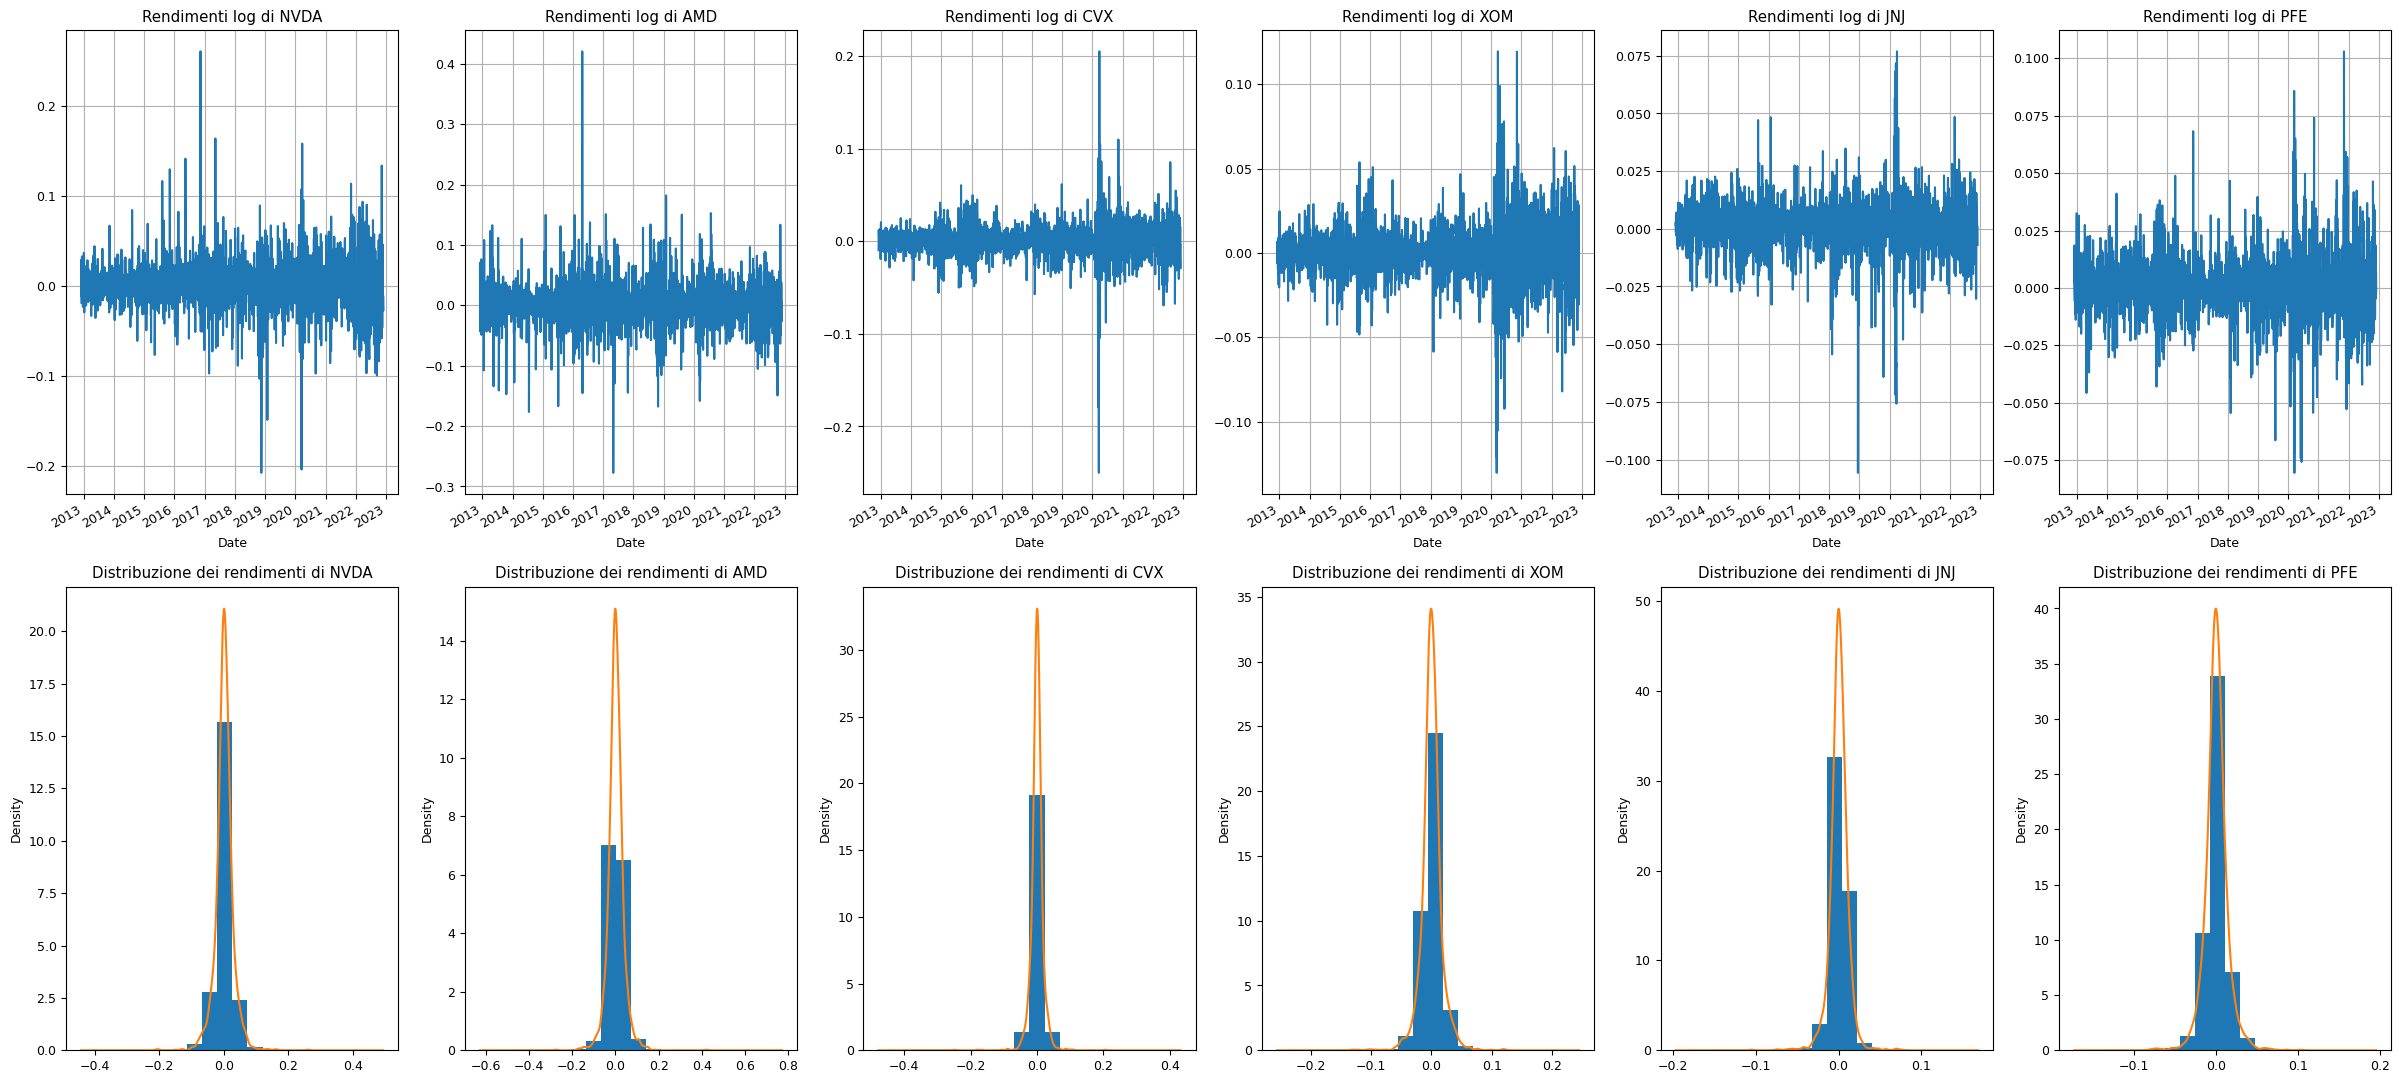

In [11]:
#rendimento_logaritmico_annuo.hist(bins=50,  grid=False, density=True, layout=(2,3), figsize=(25, 8), zorder=1, rwidth=0.9, range=(-0.3, 0.3))
#rendimento_logaritmico_annuo.plot.density()

plt.figure(figsize=(30,15))
plt.rc('font', size=9)

plt.subplot(261)
rendimento_logaritmico_annuo['NVDA'].plot(grid=True, title = 'Rendimenti log di NVDA')
plt.subplot(262)
rendimento_logaritmico_annuo['AMD'].plot(grid=True, title = 'Rendimenti log di AMD')
plt.subplot(263)
rendimento_logaritmico_annuo['CVX'].plot(grid=True, title = 'Rendimenti log di CVX')
plt.subplot(264)
rendimento_logaritmico_annuo['XOM'].plot(grid=True, title = 'Rendimenti log di XOM')
plt.subplot(265)
rendimento_logaritmico_annuo['JNJ'].plot(grid=True, title = 'Rendimenti log di JNJ')
plt.subplot(266)
rendimento_logaritmico_annuo['PFE'].plot(grid=True, title = 'Rendimenti log di PFE')

plt.subplot(267)
plt.hist(rendimento_logaritmico_annuo['NVDA'], density = True)
plt.title('Distribuzione dei rendimenti di NVDA')
rendimento_logaritmico_annuo['NVDA'].plot.density()
plt.subplot(268)
plt.hist(rendimento_logaritmico_annuo['AMD'], density = True)
plt.title('Distribuzione dei rendimenti di AMD')
rendimento_logaritmico_annuo['AMD'].plot.density();
plt.subplot(269)
plt.hist(rendimento_logaritmico_annuo['CVX'], density = True)
plt.title('Distribuzione dei rendimenti di CVX')
rendimento_logaritmico_annuo['CVX'].plot.density()
plt.subplot(2,6,10)
plt.hist(rendimento_logaritmico_annuo['XOM'], density = True)
plt.title('Distribuzione dei rendimenti di XOM')
rendimento_logaritmico_annuo['XOM'].plot.density();
plt.subplot(2,6,11)
plt.hist(rendimento_logaritmico_annuo['JNJ'], density = True)
plt.title('Distribuzione dei rendimenti di JNJ')
rendimento_logaritmico_annuo['JNJ'].plot.density();
plt.subplot(2,6,12)
plt.hist(rendimento_logaritmico_annuo['PFE'], density = True)
plt.title('Distribuzione dei rendimenti di PFE')
rendimento_logaritmico_annuo['PFE'].plot.density();


Dispersione dei rendimenti

In [12]:
dispersione_rendimenti = rendimento_logaritmico_annuo.std() #dispersione rendimenti
dispersione_rendimenti

AMD     0.036327
CVX     0.018264
JNJ     0.011146
NVDA    0.027578
PFE     0.013768
XOM     0.016835
dtype: float64

### Grafici rendimenti logaritmici di ciascun titolo

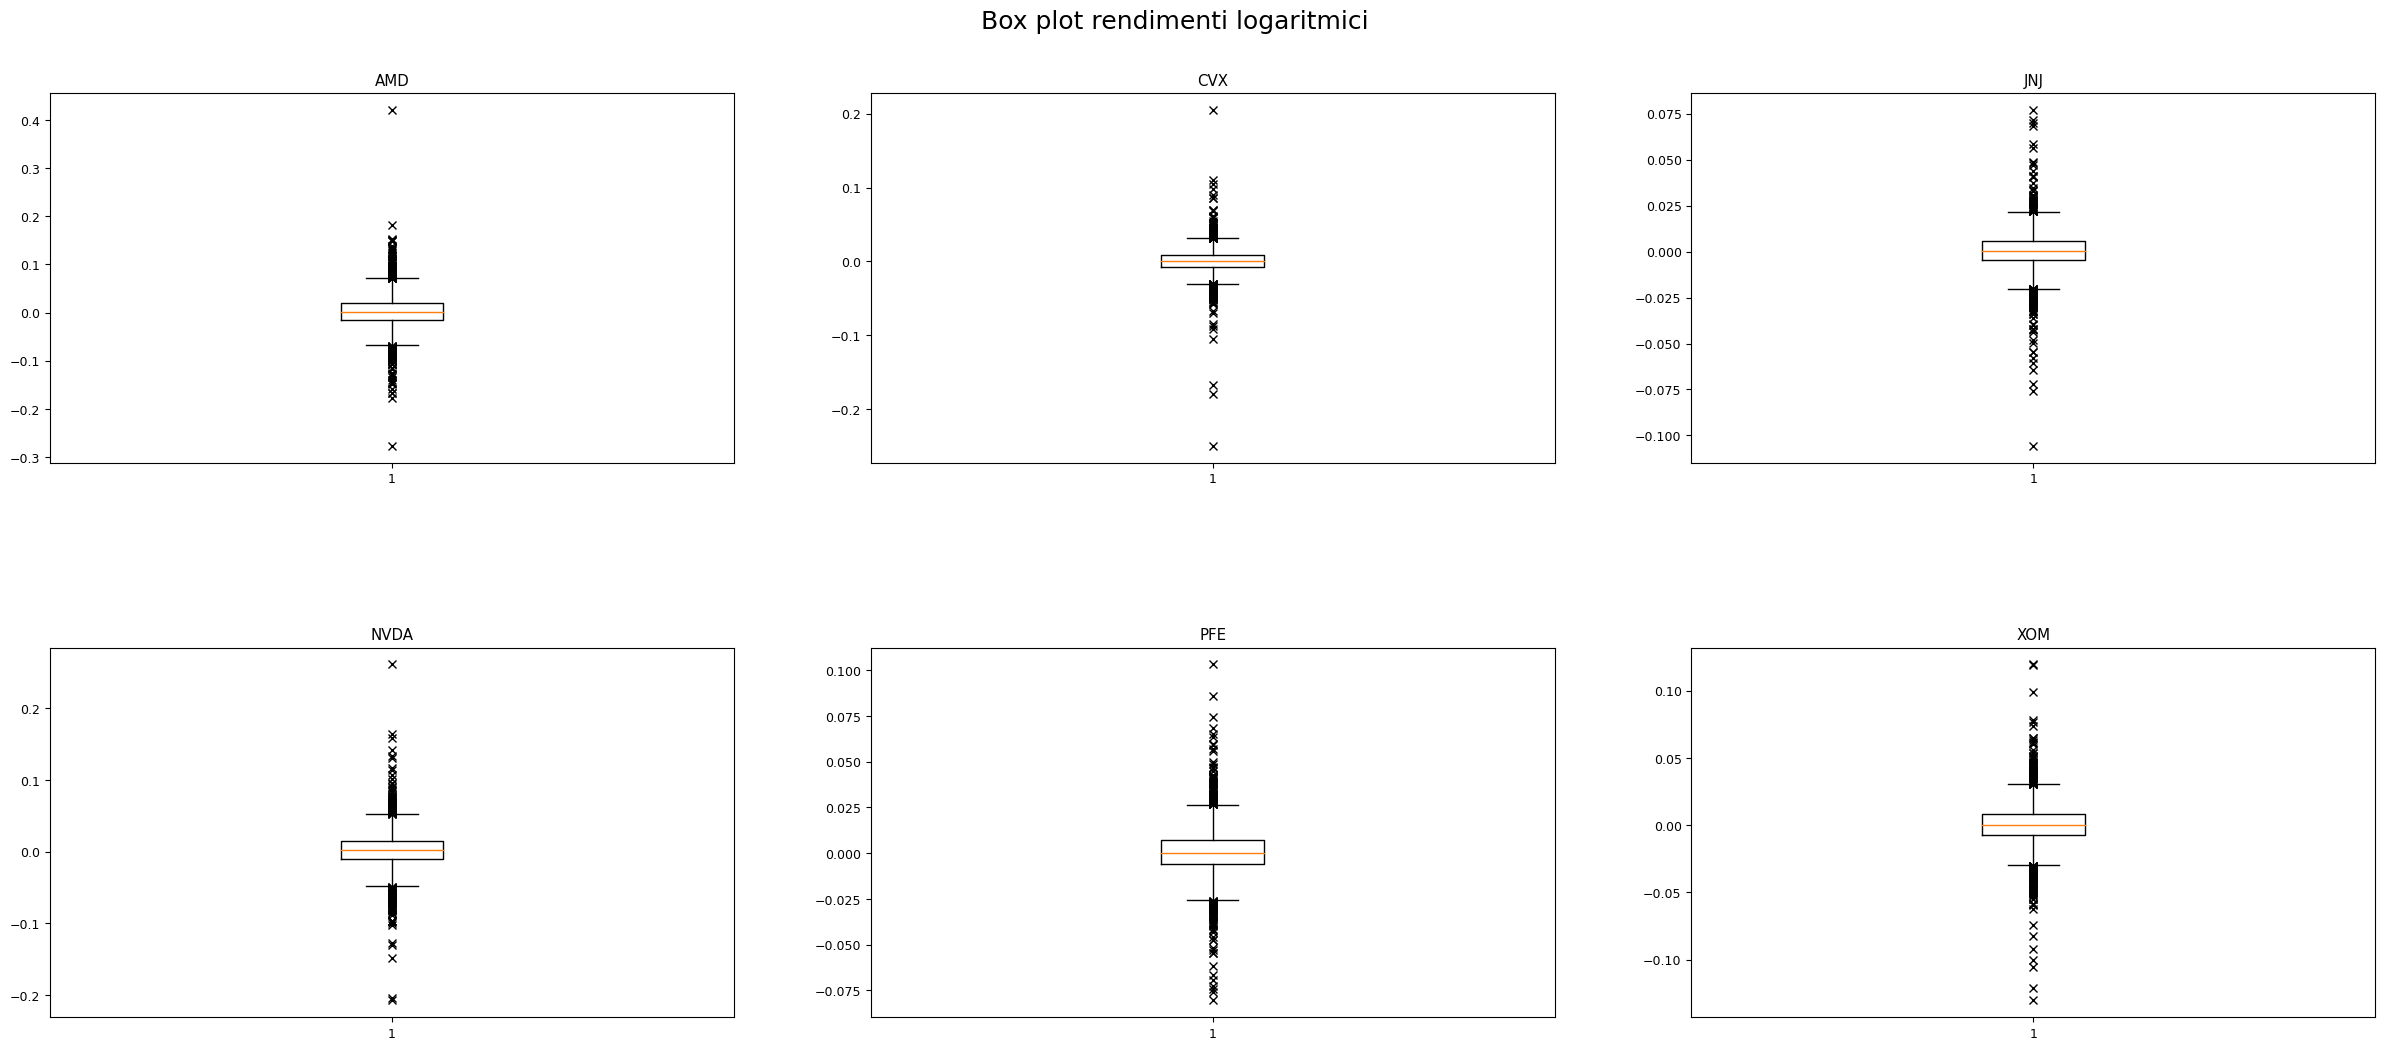

In [13]:
plt.figure(figsize=(30, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Box plot rendimenti logaritmici", fontsize=18, y=0.95)

for n, ticker in enumerate(rendimento_logaritmico_annuo.columns):
    ax = plt.subplot(2, 3, n + 1)
    plt.boxplot(rendimento_logaritmico_annuo[ticker], sym = 'x')

    ax.set_title(ticker.upper())


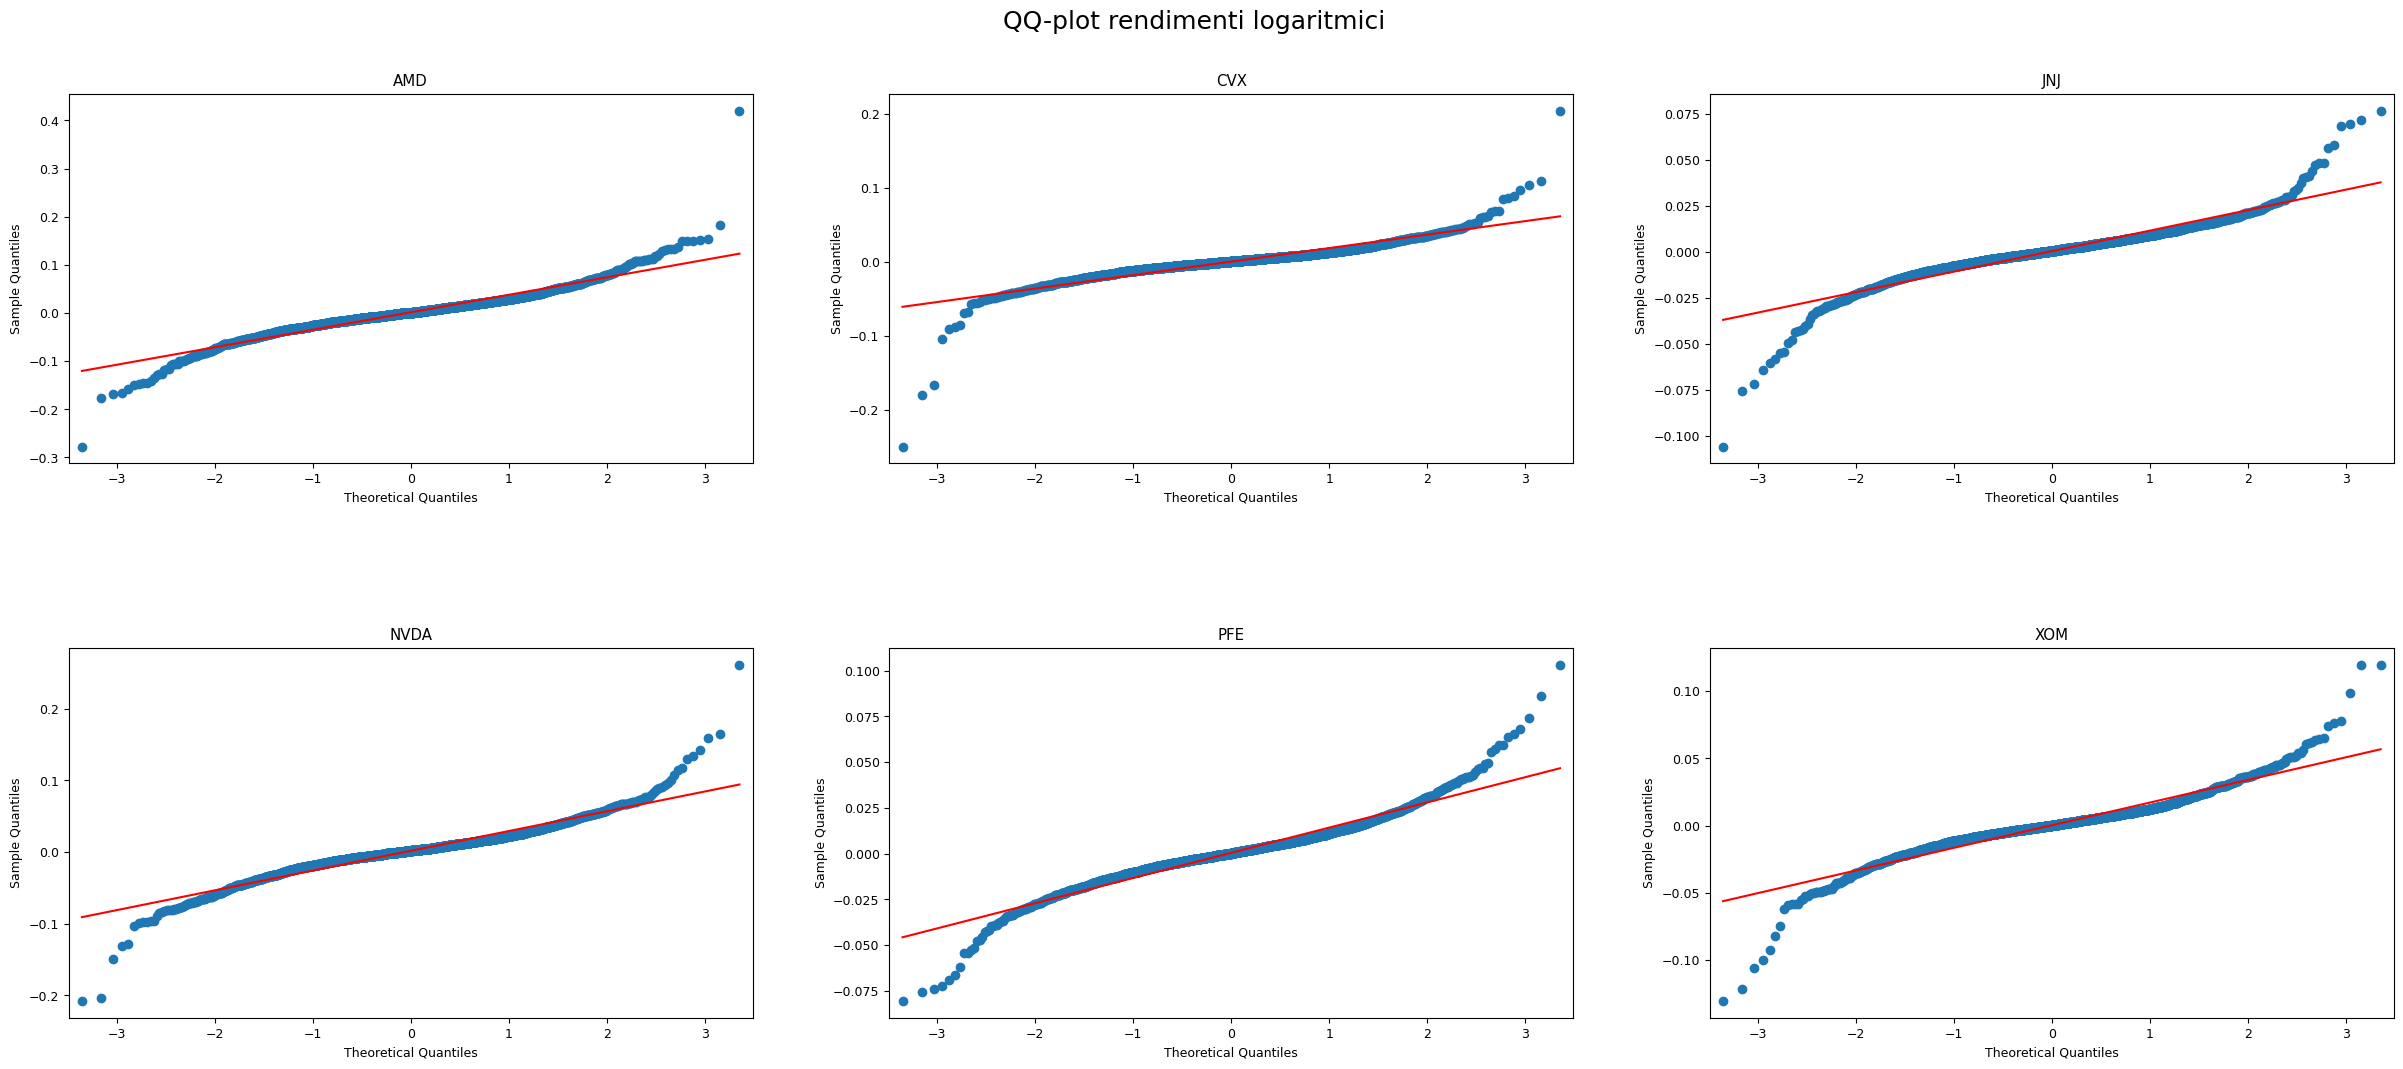

In [14]:
plt.figure(figsize=(30, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("QQ-plot rendimenti logaritmici", fontsize=18, y=0.95)

for n, ticker in enumerate(rendimento_logaritmico_annuo.columns):
    ax = plt.subplot(2, 3, n + 1)
    sm.qqplot(rendimento_logaritmico_annuo[ticker], line = 's', ax=ax)

    ax.set_title(ticker.upper())

### Statistiche descrittive univariate dei rendimenti logaritmici 

In [15]:
#Media
rendimento_logaritmico_annuo.mean()


AMD     0.001394
CVX     0.000378
JNJ     0.000476
NVDA    0.001604
PFE     0.000434
XOM     0.000258
dtype: float64

In [16]:
#Varianza
rendimento_logaritmico_annuo.var()

AMD     0.001320
CVX     0.000334
JNJ     0.000124
NVDA    0.000761
PFE     0.000190
XOM     0.000283
dtype: float64

In [17]:
#Deviazione standard
rendimento_logaritmico_annuo.std()

AMD     0.036327
CVX     0.018264
JNJ     0.011146
NVDA    0.027578
PFE     0.013768
XOM     0.016835
dtype: float64

In [18]:
#Asimmetria
rendimento_logaritmico_annuo.skew()

AMD     0.423526
CVX    -1.002685
JNJ    -0.474641
NVDA    0.050369
PFE     0.167882
XOM    -0.172311
dtype: float64

In [19]:
#Curtosi
rendimento_logaritmico_annuo.kurtosis()


AMD     10.864245
CVX     29.385273
JNJ     10.249166
NVDA     8.547602
PFE      5.677440
XOM      7.879792
dtype: float64

In [20]:
#Matrice covarianza
rendimento_logaritmico_annuo.cov()

,AMD,CVX,JNJ,NVDA,PFE,XOM
AMD,0.001320,0.000163,0.000075,0.000561,0.000100,0.000128
CVX,0.000163,0.000334,0.000078,0.000153,0.000081,0.000256
JNJ,0.000075,0.000078,0.000124,0.000078,0.000084,0.000067
NVDA,0.000561,0.000153,0.000078,0.000761,0.000091,0.000124
PFE,0.000100,0.000081,0.000084,0.000091,0.000190,0.000074
XOM,0.000128,0.000256,0.000067,0.000124,0.000074,0.000283


<AxesSubplot: >

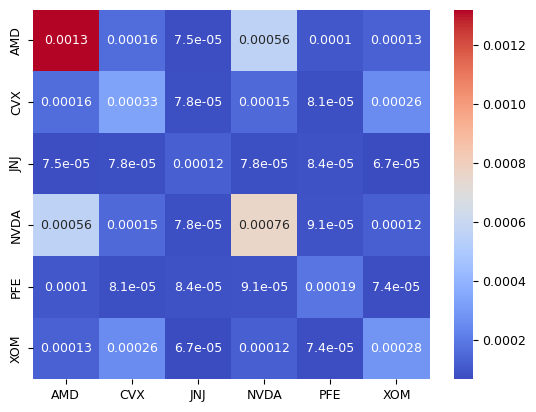

In [55]:
#Matrice delle varianze-covarianze
sns.heatmap(rendimento_logaritmico_annuo.cov(), annot=True, cmap='coolwarm')

<AxesSubplot: >

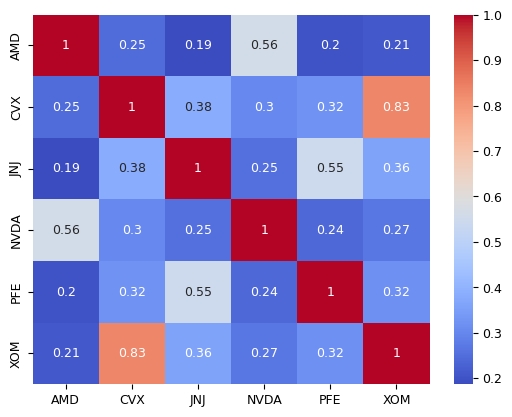

In [22]:
#Matrice di correlazione con seaborn
sns.heatmap(rendimento_logaritmico_annuo.corr(), annot = True, cmap = 'coolwarm')

In [23]:
rendimento_logaritmico_annuo= rendimento_logaritmico_annuo.dropna()

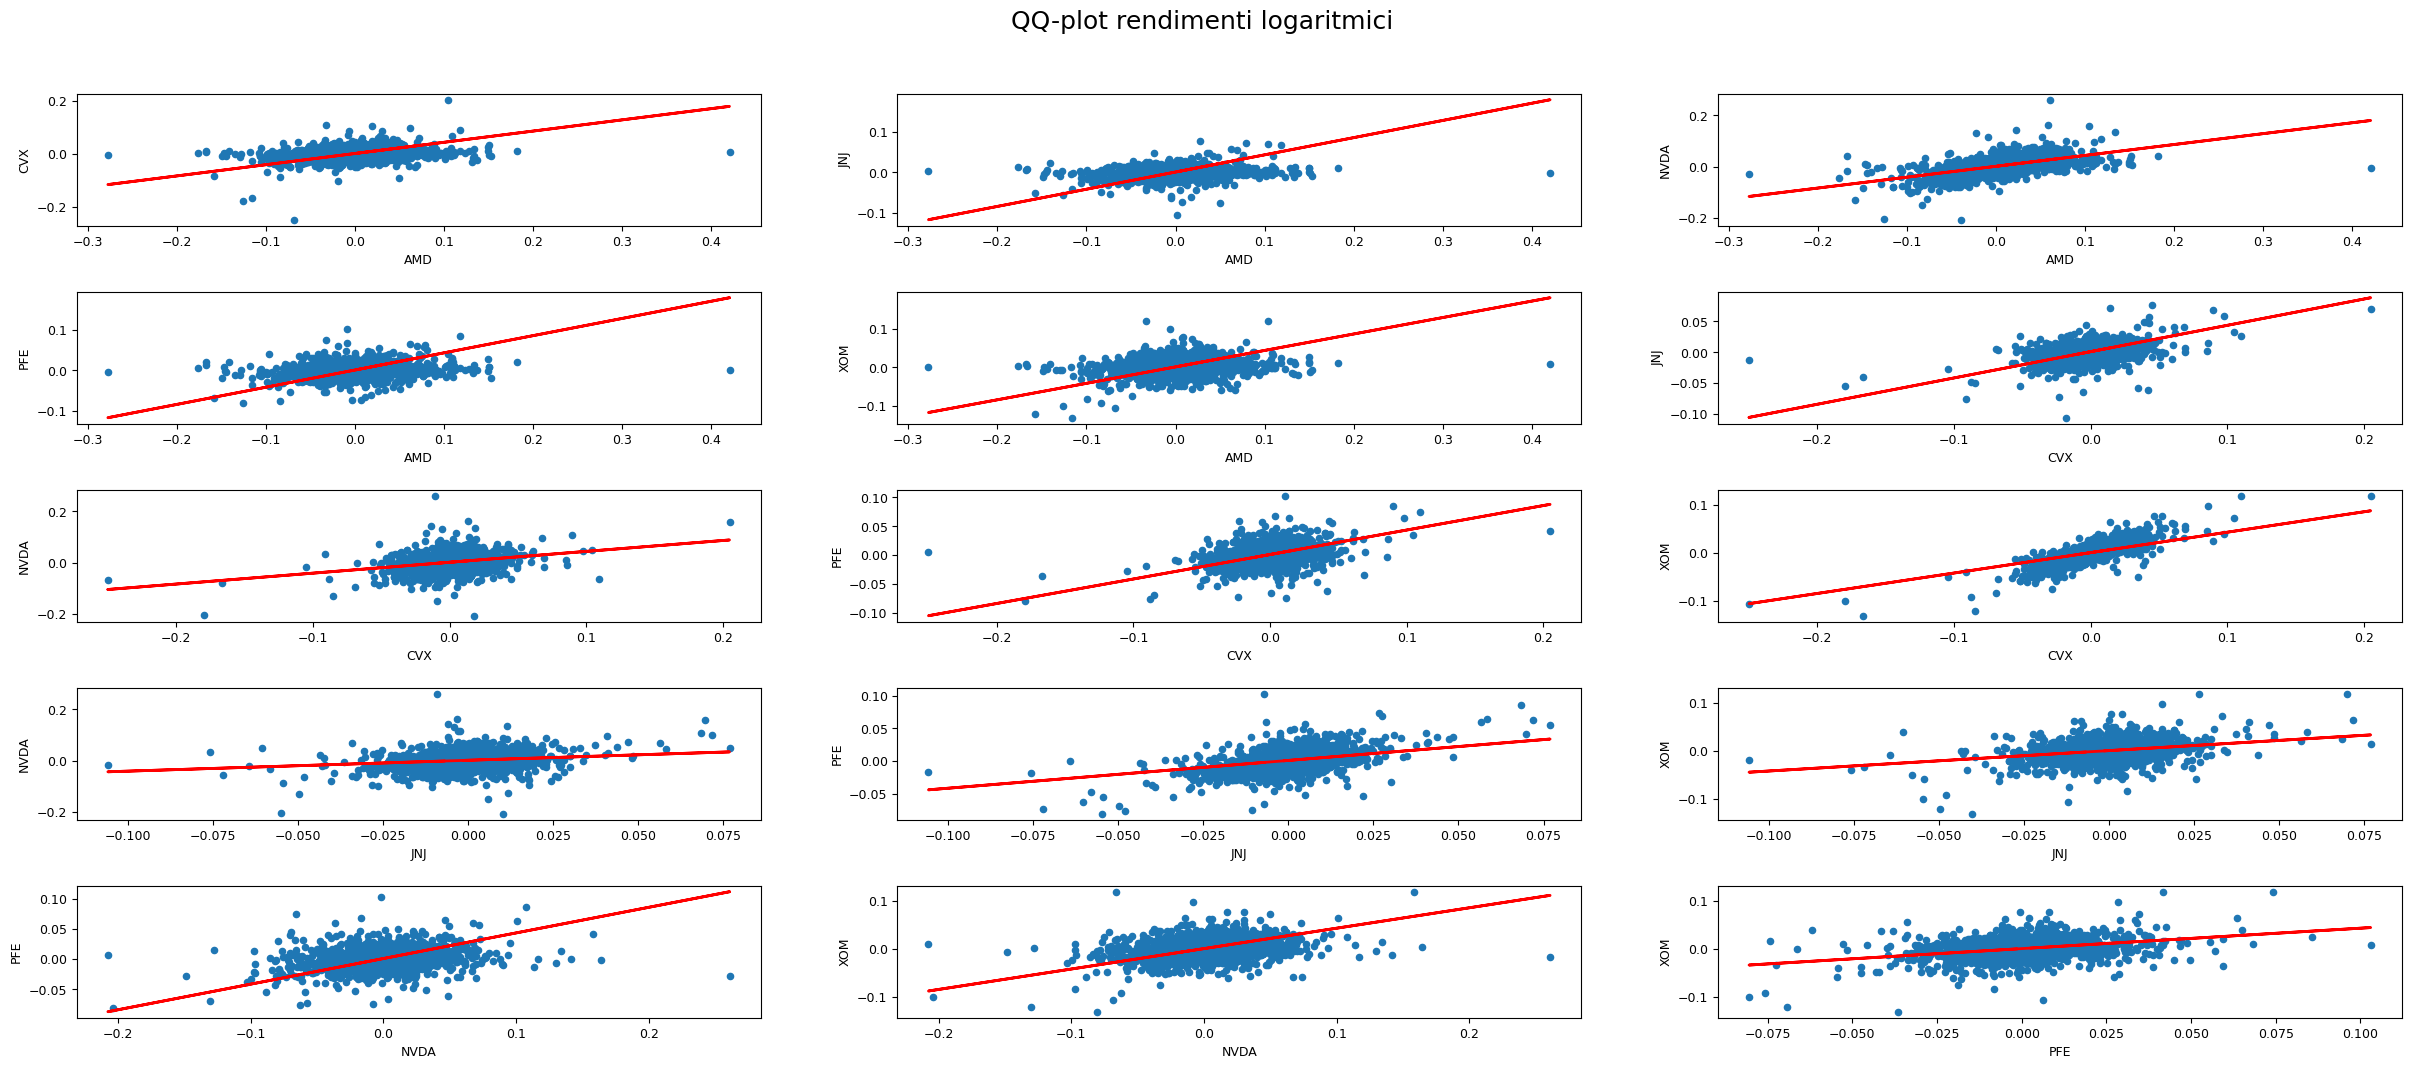

In [77]:
plt.figure(figsize=(30, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Scatter plot", fontsize=18, y=0.95)

for i in range(0, len(rendimento_logaritmico_annuo.columns)) :
    symbol_1=rendimento_logaritmico_annuo.columns[i]
    if(i!=0):
        temp=temp+i
    else:
        temp=0
    for y in range(i, len(rendimento_logaritmico_annuo.columns)) :
        symbol_2= rendimento_logaritmico_annuo.columns[y]
        if symbol_1 != symbol_2 :
            num=i*5+y-temp
            ax = plt.subplot(5, 3, num)
            reg = np.polyfit(rendimento_logaritmico_annuo['AMD'], rendimento_logaritmico_annuo['NVDA'], deg=1)
            ax = rendimento_logaritmico_annuo.plot(kind = 'scatter', x = symbol_1, y= symbol_2, ax=ax)
            ax.plot(rendimento_logaritmico_annuo[symbol_1], np.polyval(reg, rendimento_logaritmico_annuo[symbol_1]), 'r', lw=2)


#reg = np.polyfit(rendimento_logaritmico_annuo['AMD'], rendimento_logaritmico_annuo['NVDA'], deg=1)

#ax = rendimento_logaritmico_annuo.plot(kind = 'scatter', x = 'AMD', y= 'NVDA', figsize=(19,8))
#ax.plot(rendimento_logaritmico_annuo['AMD'], np.polyval(reg, rendimento_logaritmico_annuo['AMD']), 'r', lw=2);

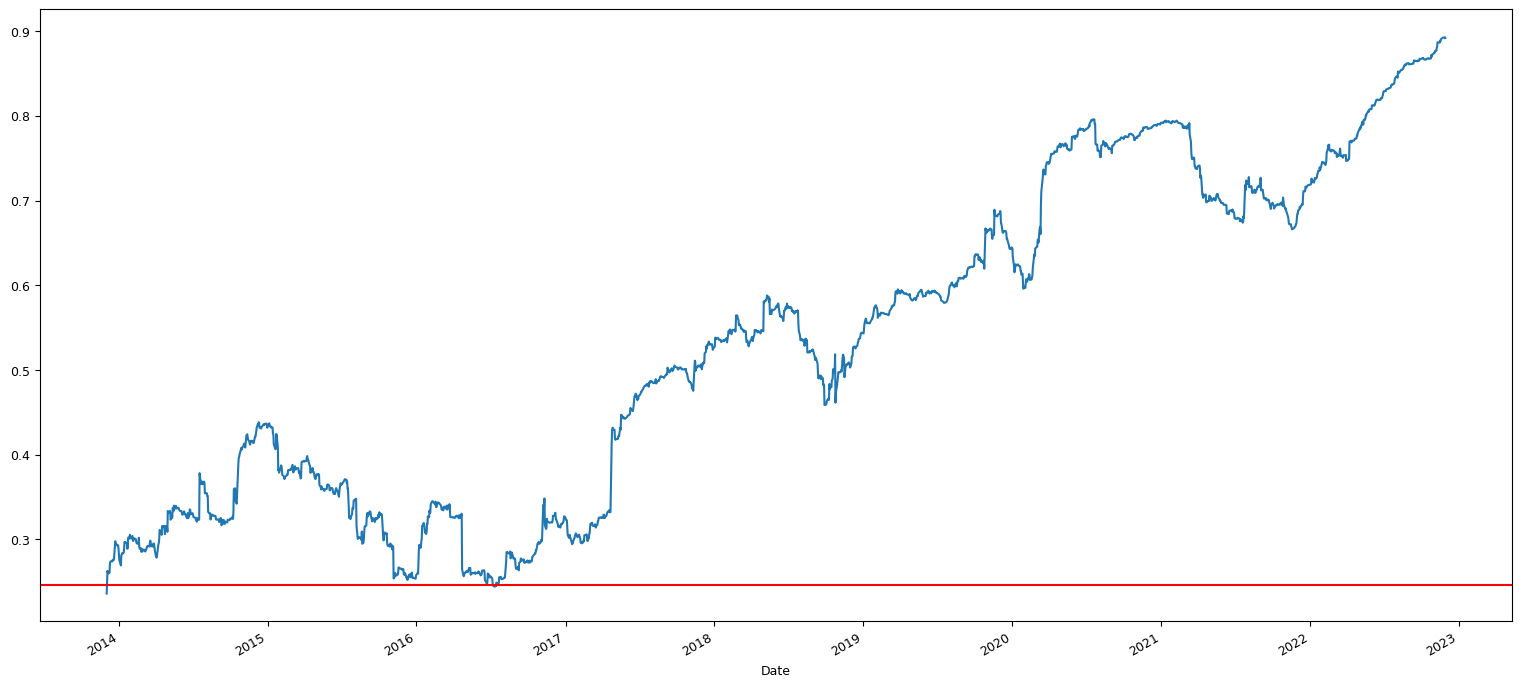

In [25]:
ax = rendimento_logaritmico_annuo['AMD'].rolling(window=252).corr(rendimento_logaritmico_annuo['NVDA']).plot(figsize=(19,9))
ax.axhline(rendimento_logaritmico_annuo.corr().iloc[0,1], c='r')

# 2.h?

### Strategie di trading e backtesting (MACD)

In [26]:
AMD_data= yf.download('AMD', start=start_date, end=end_date)
AMD_data = AMD_data.drop(columns = ['High', 'Low', 'Open', 'Close'])

AMD_data['SMA20'] = AMD_data['Adj Close'].rolling(20).mean()
AMD_data['SMA120'] = AMD_data['Adj Close'].rolling(120).mean()
AMD_data.head()

[*********************100%***********************]  1 of 1 completed


,Adj Close,Volume,SMA20,SMA120
Date,,,,
2012-11-30,2.20,66853900,NaN,NaN
2012-12-03,2.36,70160800,NaN,NaN
2012-12-04,2.26,52165300,NaN,NaN
2012-12-05,2.29,20378800,NaN,NaN
2012-12-06,2.34,22223500,NaN,NaN


Creo strategia di trading con MACD

In [27]:
AMD_data['Price_yesterday'] = AMD_data['Adj Close'].shift(1)
AMD_data['Change'] = AMD_data['Adj Close'] / AMD_data['Price_yesterday']
AMD_data['Invested_SMA'] = [1 if AMD_data.loc[i, 'SMA20'] > AMD_data.loc[i, 'SMA120'] 
                        else 0 for i in AMD_data.index]


sma = AMD_data[AMD_data['Invested_SMA'] == 1]
sma['Return'] = np.cumprod(sma['Change'])
sma['rtn'] =sma['Return'].pct_change()

print(sma['rtn'].std()*np.sqrt(252))

print(sma['rtn'].mean()*252 / (sma['rtn'].std()*np.sqrt(252)))

0.601921329880631
0.9826150202553676


C:\Users\stefa\AppData\Local\Temp\ipykernel_13844\1162296323.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sma['Return'] = np.cumprod(sma['Change'])
C:\Users\stefa\AppData\Local\Temp\ipykernel_13844\1162296323.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sma['rtn'] =sma['Return'].pct_change()


Rendimento buy and hold 

In [28]:
AMD_data['Buy_and_hold'] = np.cumprod(AMD_data['Change'])
AMD_data['rtn'] = AMD_data['Buy_and_hold'].pct_change()

print(AMD_data['rtn'].std())
print(AMD_data['rtn'].mean()*252 / (AMD_data['rtn'].std()*np.sqrt(252)))

0.03684099211696575
0.8754924594675738


Medie mobili esponenziali

In [29]:
AMD_data['EWM12'] = AMD_data['Adj Close'].ewm(span=12, adjust=False).mean()
AMD_data['EWM26'] = AMD_data['Adj Close'].ewm(span=26, adjust=False).mean()
AMD_data['Invested_EWM'] = [1 if AMD_data.loc[i, 'EWM12'] > AMD_data.loc[i, 'EWM26'] 
                        else 0 for i in AMD_data.index]
ewm = AMD_data[AMD_data['Invested_EWM'] == 1]
ewm['Return'] = np.cumprod(ewm['Change'])

C:\Users\stefa\AppData\Local\Temp\ipykernel_13844\879401688.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ewm['Return'] = np.cumprod(ewm['Change'])


Google trend "amd stock" globale

In [30]:
AMD_stock_trend= pd.read_csv('amd-stock.csv', index_col = 'date', parse_dates = True)
AMD_stock_trend

,stock
date,
2012-12-01,4
2013-01-01,6
2013-02-01,5
2013-03-01,4
2013-04-01,5
...,...
2022-07-01,48
2022-08-01,61
2022-09-01,47


Confronto delle strategie

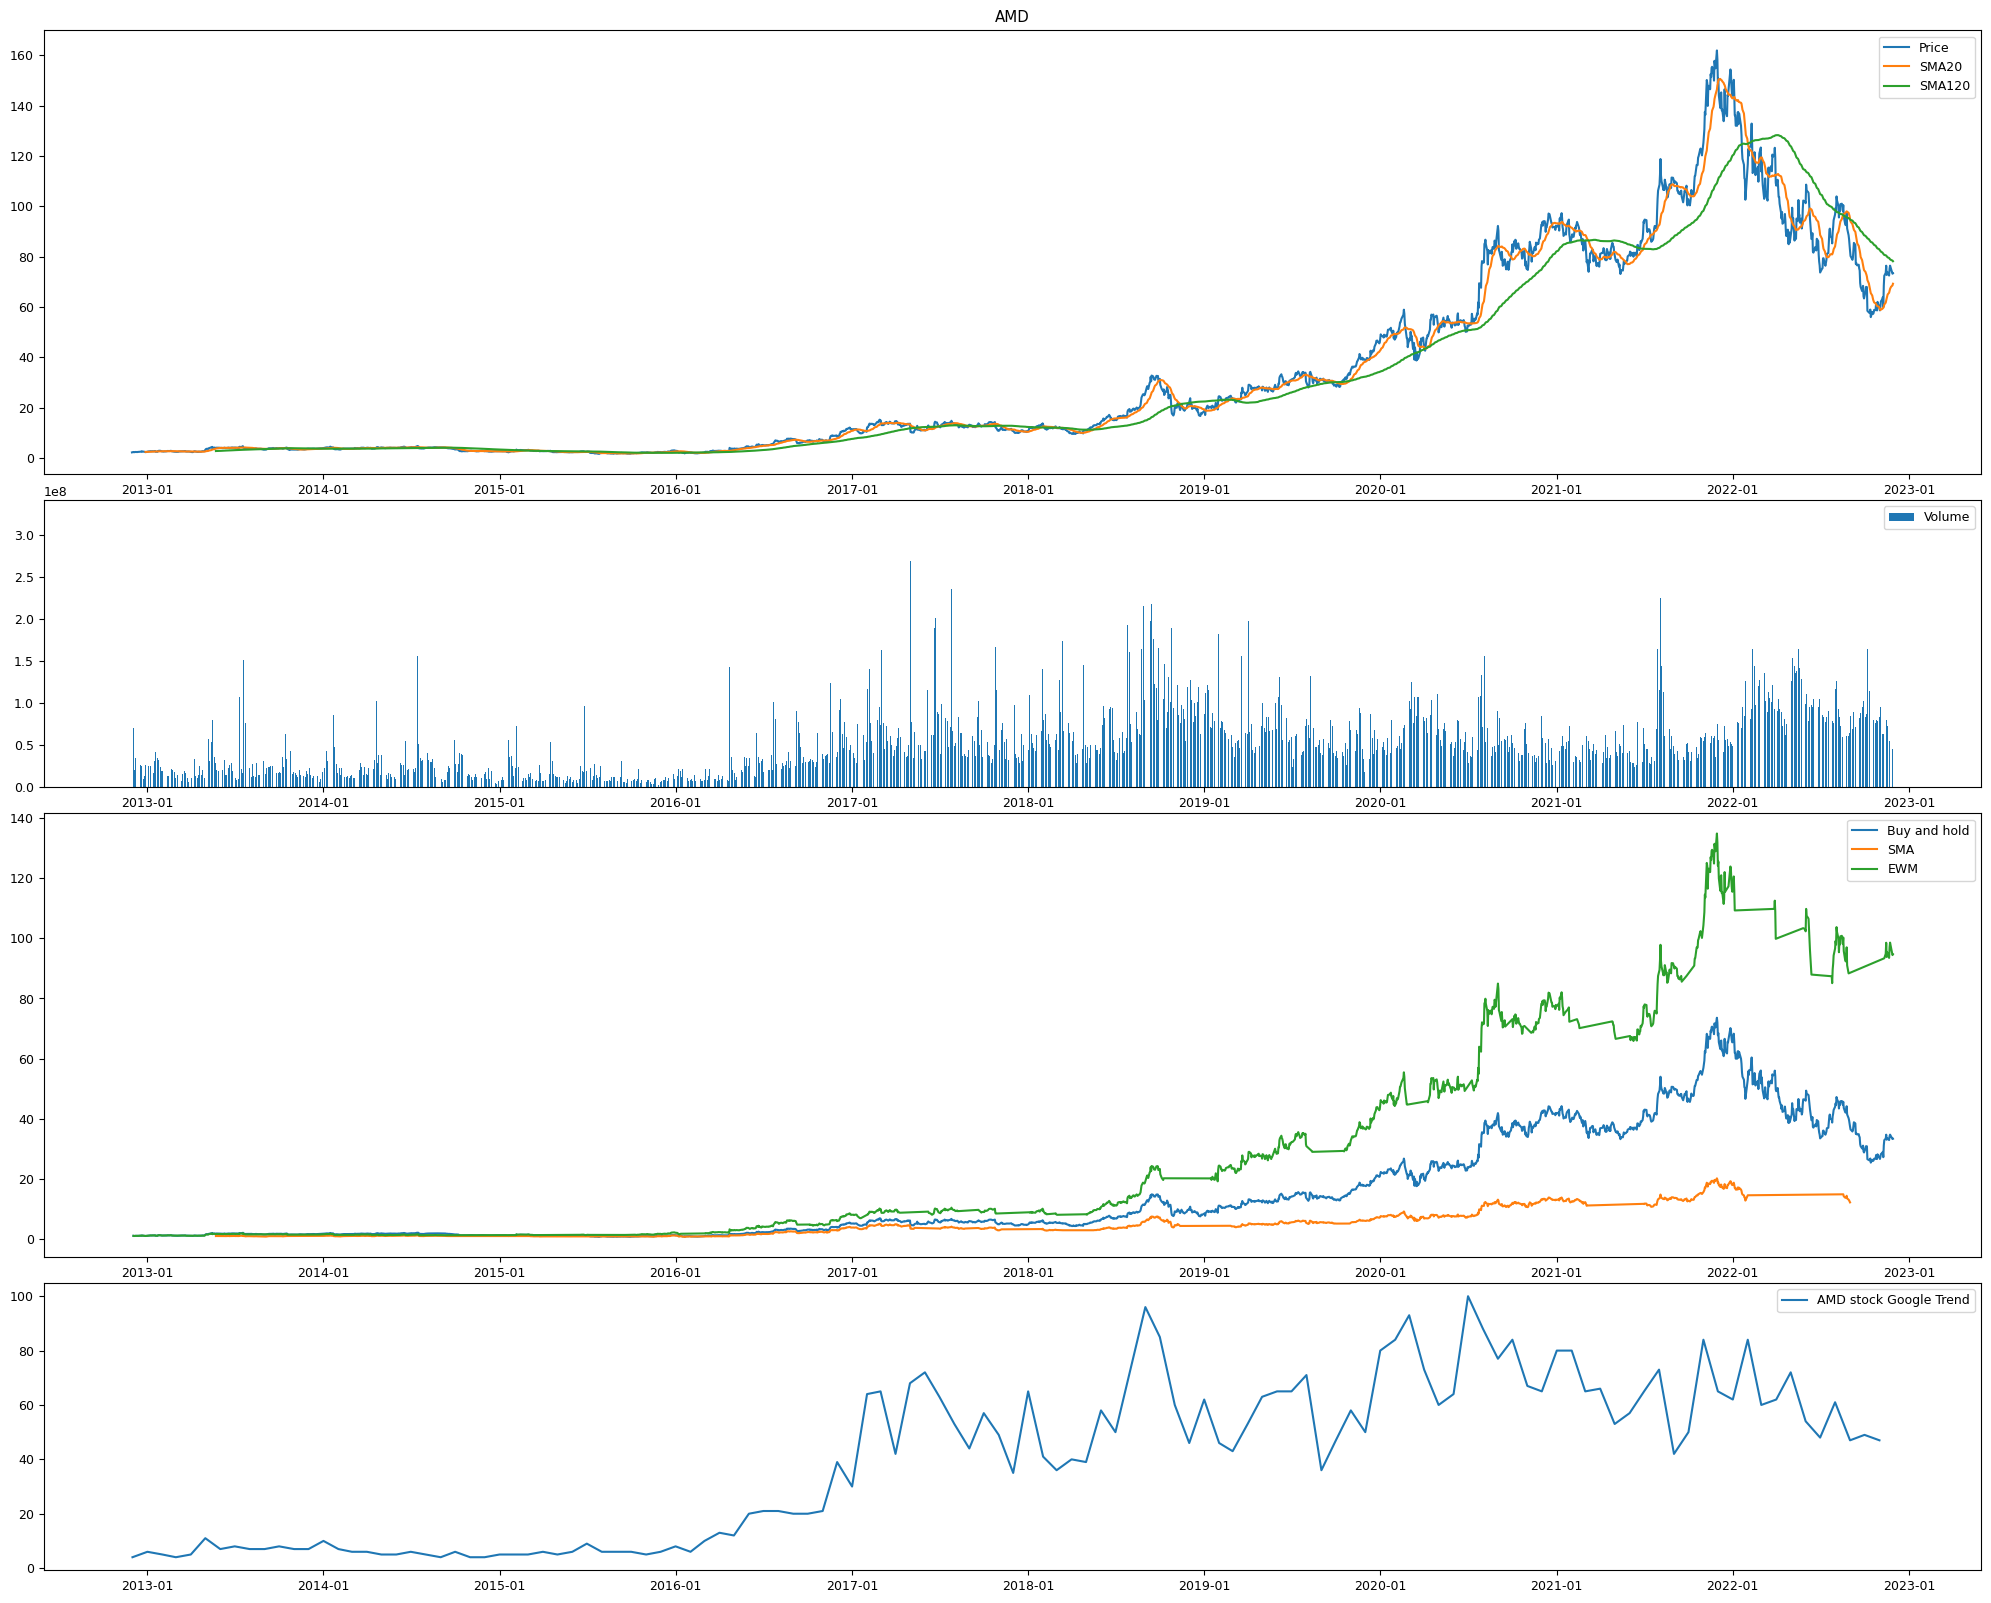

In [31]:
plt.figure(figsize=(25,20))
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 3, colspan = 1, title = "AMD")
ax2 = plt.subplot2grid((10,1), (3,0), rowspan = 2, colspan = 1, sharex = ax1)
ax3 = plt.subplot2grid((10,1), (5,0), rowspan = 3, colspan = 1, sharex = ax1)
ax4 = plt.subplot2grid((10,1), (8,0), rowspan = 2, colspan = 1, sharex = ax1)

ax1.plot(AMD_data['Adj Close'], label = 'Price')
ax1.plot(AMD_data['SMA20'], label = 'SMA20')
ax1.plot(AMD_data['SMA120'], label = 'SMA120')
#ax1.plot(AMD_data['EWM12'], label = 'EWM12')
#ax1.plot(AMD_data['EWM26'], label = 'EWM26')

ax2.bar(AMD_data.index, AMD_data['Volume'], label = 'Volume')
ax3.plot(AMD_data['Buy_and_hold'], label = 'Buy and hold')
ax3.plot(sma['Return'], label = 'SMA')
ax3.plot(ewm['Return'], label ='EWM')
ax4.plot(AMD_stock_trend, label ='AMD stock Google Trend')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax3.set_xlabel('Date (Year - month)')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

plt.show()

### CAPM

In [32]:
rendimento_logaritmico_mensile= np.log(dataframe.resample("M").last()/dataframe.resample("M").last().shift())

market_benchmark= yf.download('^GSPC', start = start_date, end = end_date)
market_benchmark= market_benchmark['Adj Close'].rename("^GSPC").resample("M").last();
market_benchmark= np.log(market_benchmark/market_benchmark.shift())

rendimento_benchmark= rendimento_logaritmico_mensile.join(market_benchmark).dropna()
rendimento_benchmark


[*********************100%***********************]  1 of 1 completed


,AMD,CVX,JNJ,NVDA,PFE,XOM,^GSPC
Date,,,,,,,
2012-12-31,0.087011,0.022916,0.005292,0.023938,0.002395,-0.018204,0.007043
2013-01-31,0.080043,0.062809,0.053060,0.000000,0.092785,0.038754,0.049198
2013-02-28,-0.043229,0.024975,0.037164,0.038222,0.003293,0.001689,0.011000
2013-03-31,0.023811,0.014154,0.068792,0.013339,0.053010,0.006234,0.035355
2013-04-30,0.100644,0.026494,0.044382,0.070706,0.007250,-0.012507,0.017924
...,...,...,...,...,...,...,...
2022-07-31,0.211384,0.123309,-0.016988,0.180792,-0.029578,0.123837,0.087201
2022-08-31,-0.107162,-0.026504,-0.071829,-0.185089,-0.110411,-0.004252,-0.043367
2022-09-30,-0.292288,-0.095456,0.012442,-0.217577,-0.033041,-0.090603,-0.098049


In [33]:
#Covarianza
covarianza = rendimento_benchmark.cov()
print(covarianza)
varianza = rendimento_benchmark["^GSPC"].var()

beta = covarianza.loc["^GSPC"] / varianza
beta

            AMD       CVX       JNJ      NVDA       PFE       XOM     ^GSPC
AMD    0.024500  0.004024  0.001483  0.009913  0.003788  0.002508  0.003629
CVX    0.004024  0.005736  0.001311  0.002363  0.001346  0.005016  0.002102
JNJ    0.001483  0.001311  0.001927  0.000831  0.001479  0.001340  0.001089
NVDA   0.009913  0.002363  0.000831  0.014064  0.001642  0.001926  0.002909
PFE    0.003788  0.001346  0.001479  0.001642  0.003695  0.000837  0.001310
XOM    0.002508  0.005016  0.001340  0.001926  0.000837  0.005782  0.001930
^GSPC  0.003629  0.002102  0.001089  0.002909  0.001310  0.001930  0.001771


AMD      2.049380
CVX      1.186900
JNJ      0.614717
NVDA     1.642723
PFE      0.739948
XOM      1.089505
^GSPC    1.000000
Name: ^GSPC, dtype: float64

### Manca 5.c

### Modello di Fama-French 3 fattori

In [34]:
factor_df = pd.read_csv('F-F_Research_Data_Factors.csv', skiprows=3)
factor_df.head()

,Unnamed: 0,Mkt-RF,SMB,HML,RF
0,192607,2.96,-2.56,-2.43,0.22
1,192608,2.64,-1.17,3.82,0.25
2,192609,0.36,-1.40,0.13,0.23
3,192610,-3.24,-0.09,0.70,0.32
4,192611,2.53,-0.10,-0.51,0.31


Eliminiamo i dati annuali in fondo al file

In [35]:
stringa = ' Annual Factors: January-December '
indices = factor_df.iloc[:,0] == stringa
start_of_annual = factor_df[indices].index[0]
factor_df = factor_df[factor_df.index < start_of_annual]

factor_df.columns = ['data', 'mkt', 'smb', 'hml', 'rf']
factor_df['data'] = pd.to_datetime(factor_df['data'], format='%Y%m').dt.strftime("%Y-%m")
factor_df.head()

,data,mkt,smb,hml,rf
0,1926-07,2.96,-2.56,-2.43,0.22
1,1926-08,2.64,-1.17,3.82,0.25
2,1926-09,0.36,-1.40,0.13,0.23
3,1926-10,-3.24,-0.09,0.70,0.32
4,1926-11,2.53,-0.10,-0.51,0.31


In [36]:
factor_df = factor_df.set_index('data')
factor_df = factor_df[start_date:end_date]
factor_df = factor_df.apply(pd.to_numeric, errors='coerce').div(100)
factor_df

,mkt,smb,hml,rf
data,,,,
2012-12,0.0118,0.0150,0.0351,0.0001
2013-01,0.0557,0.0033,0.0096,0.0000
2013-02,0.0129,-0.0028,0.0011,0.0000
2013-03,0.0403,0.0081,-0.0019,0.0000
2013-04,0.0155,-0.0236,0.0045,0.0000
...,...,...,...,...
2022-07,0.0957,0.0281,-0.0410,0.0008
2022-08,-0.0377,0.0139,0.0031,0.0019
2022-09,-0.0935,-0.0082,0.0003,0.0019


In [37]:
rendimento_semplice_mensile= rendimento_semplice.resample("M").last().dropna()
rendimento_semplice_mensile.index = rendimento_semplice_mensile.index.strftime('%Y-%m')
rendimento_semplice_mensile.head()

,AMD,CVX,JNJ,NVDA,PFE,XOM
Date,,,,,,
2012-12,0.052632,0.015876,0.008923,0.013223,0.007634,0.017039
2013-01,-0.018868,-0.011163,-0.002295,-0.004871,-0.008360,-0.007720
2013-02,-0.015810,0.004287,-0.002751,0.004762,-0.001459,0.000223
2013-03,0.000000,-0.011399,0.003200,0.014229,0.007682,-0.005189
2013-04,0.052239,0.005688,-0.004090,0.014739,-0.044693,0.008843


In [38]:
ff_data = factor_df.join(rendimento_semplice_mensile.add_prefix("rtn_")).dropna()

mylist=["rtn_NVDA", "rtn_PFE", "rtn_JNJ", "rtn_XOM", "rtn_PYPL", "rtn_CVX"]

eccessi= pd.DataFrame({"excess_"+symbol: ff_data[symbol] - ff_data.rf
               for symbol in ff_data 
               if symbol in mylist})
               
#ff_data['excess_rtn'] = ff_data.JNJ - ff_data.rf
eccessi= ff_data.join(eccessi)

eccessi.head()

,mkt,smb,hml,rf,rtn_AMD,rtn_CVX,rtn_JNJ,rtn_NVDA,rtn_PFE,rtn_XOM,excess_rtn_CVX,excess_rtn_JNJ,excess_rtn_NVDA,excess_rtn_PFE,excess_rtn_XOM
data,,,,,,,,,,,,,,,
2012-12,0.0118,0.0150,0.0351,0.0001,0.052632,0.015876,0.008923,0.013223,0.007634,0.017039,0.015776,0.008823,0.013123,0.007534,0.016939
2013-01,0.0557,0.0033,0.0096,0.0000,-0.018868,-0.011163,-0.002295,-0.004871,-0.008360,-0.007720,-0.011163,-0.002295,-0.004871,-0.008360,-0.007720
2013-02,0.0129,-0.0028,0.0011,0.0000,-0.015810,0.004287,-0.002751,0.004762,-0.001459,0.000223,0.004287,-0.002751,0.004762,-0.001459,0.000223
2013-03,0.0403,0.0081,-0.0019,0.0000,0.000000,-0.011399,0.003200,0.014229,0.007682,-0.005189,-0.011399,0.003200,0.014229,0.007682,-0.005189
2013-04,0.0155,-0.0236,0.0045,0.0000,0.052239,0.005688,-0.004090,0.014739,-0.044693,0.008843,0.005688,-0.004090,0.014739,-0.044693,0.008843


In [39]:
symbol_list=["excess_rtn_NVDA", "excess_rtn_PFE", "excess_rtn_JNJ", "excess_rtn_XOM", "excess_rtn_PYPL", "excess_rtn_CVX"]
ff_model= [smf.ols(formula = symbol+' ~ mkt + smb + hml', data = eccessi).fit() for symbol in eccessi if symbol in symbol_list]

print(ff_model[1].summary())

                            OLS Regression Results                            
Dep. Variable:         excess_rtn_JNJ   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.822
Date:                Tue, 10 Jan 2023   Prob (F-statistic):              0.147
Time:                        23:30:48   Log-Likelihood:                 386.54
No. Observations:                 120   AIC:                            -765.1
Df Residuals:                     116   BIC:                            -753.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0039      0.001     -4.172      0.0

In [40]:
df = yf.download('NVDA', start = start_date, end = end_date)

[*********************100%***********************]  1 of 1 completed


### ARIMA FORECASTING

In [41]:
# JNJ, PFE, XOM, AMD, CVX, NVDA
df_settle=dataframe["JNJ"].resample("M").last()

train_data = df_settle[:80]
test_data = df_settle[80:30]

<Figure size 640x480 with 0 Axes>

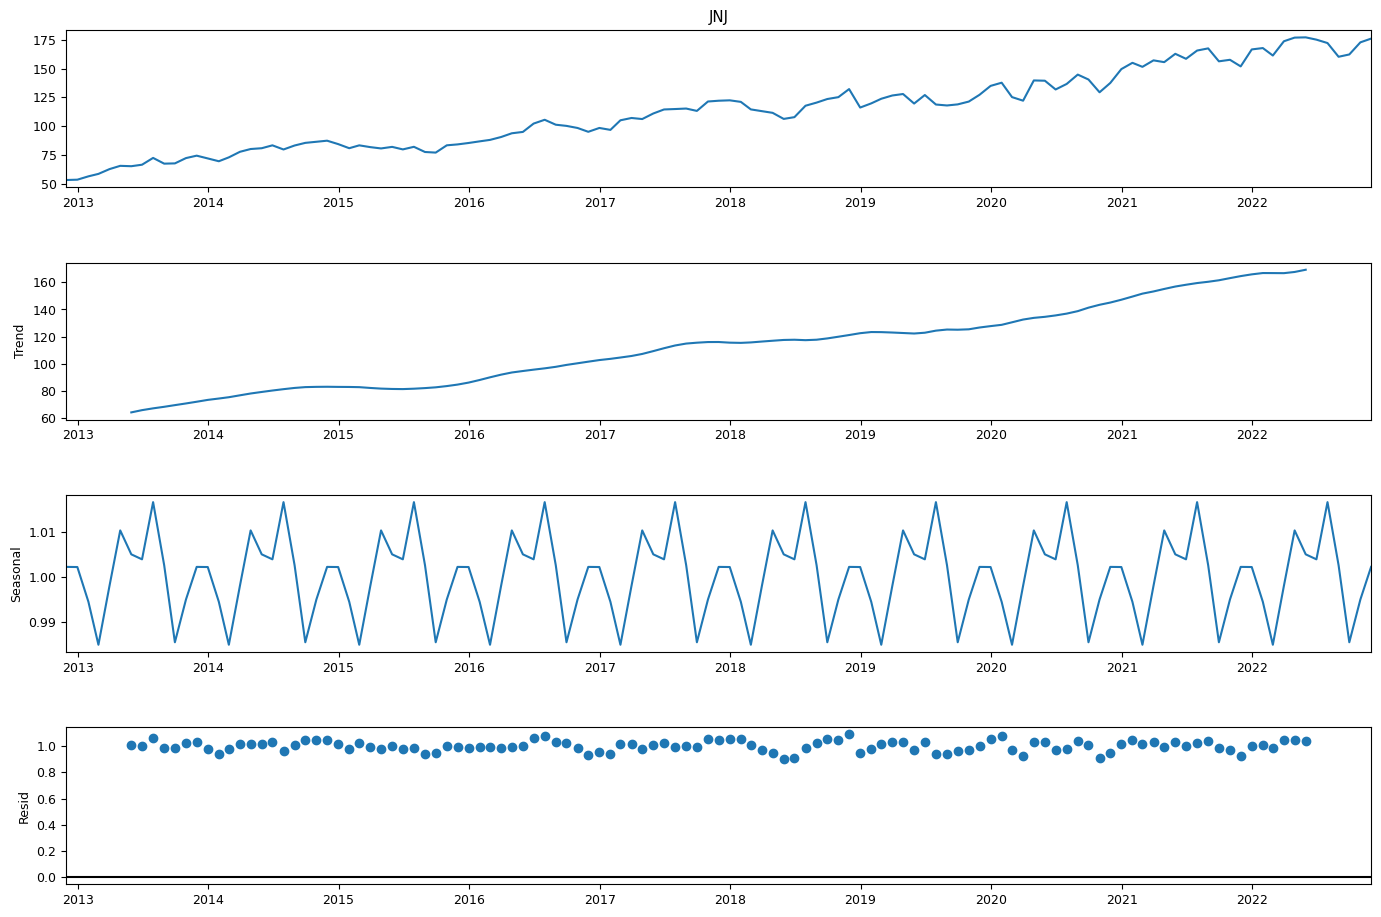

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_settle, 
                            model='multiplicative')
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

Cerchiamo il valore di p (quinta linea)

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

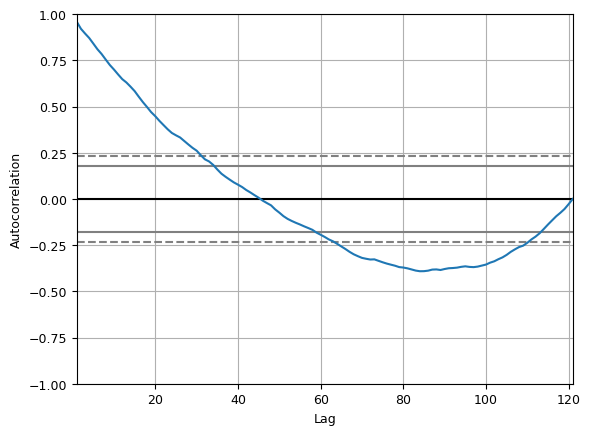

In [43]:
pd.plotting.autocorrelation_plot(df_settle)

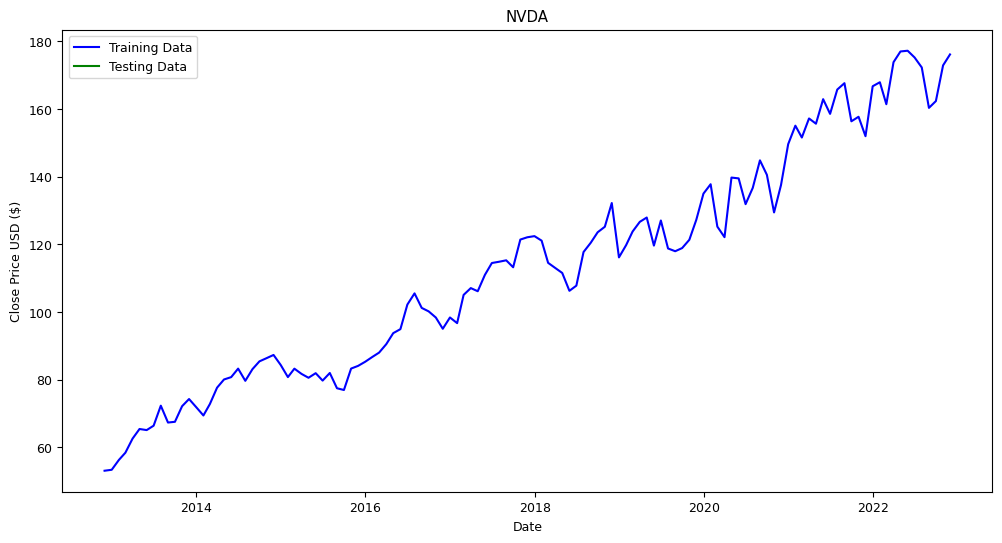

In [44]:
plt.figure(figsize=(12,6))
plt.title('NVDA')
plt.plot(
    df_settle, 'blue', label='Training Data')
plt.plot(test_data, 'green', label='Testing Data')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend()

In [45]:
test_data.shape

(0,)

In [46]:
"""
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")
p, d, q = 1, 1, 6
model=sm.tsa.statespace.SARIMAX(train_data,
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))

fitted=model.fit()
print(fitted.forecast(9, alpha=0.05))  # 95% conf
predictions = fitted.predict(len(train_data), len(df_settle))

df_settle.plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")
"""

'\nimport statsmodels.api as sm\nimport warnings\n\nwarnings.filterwarnings("ignore")\np, d, q = 1, 1, 6\nmodel=sm.tsa.statespace.SARIMAX(train_data,\n                                order=(p, d, q),\n                                seasonal_order=(p, d, q, 12))\n\nfitted=model.fit()\nprint(fitted.forecast(9, alpha=0.05))  # 95% conf\npredictions = fitted.predict(len(train_data), len(df_settle))\n\ndf_settle.plot(legend=True, label="Training Data", figsize=(15, 10))\npredictions.plot(legend=True, label="Predictions")\n'

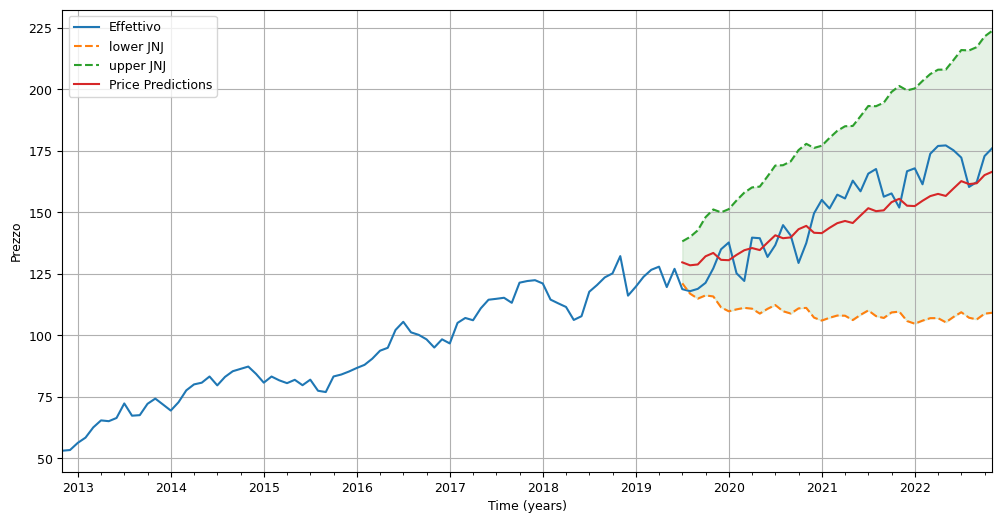

In [47]:
train_data = df_settle[:80]

def arima_grid_search(dataframe, s):
    p = d = q = range(2)
    param_combinations = list(itertools.product(p, d, q))
    lowest_aic, pdq, pdqs = None, None, None
    total_iterations = 0
    for order in param_combinations:
        for (p, q, d) in param_combinations:
            seasonal_order = (p, q, d, s)
            total_iterations += 1
            try:
                model = SARIMAX(dataframe, order = order,
                               seasonal_order= seasonal_order,
                               enforce_stationarity=False,
                               enforce_invertibility=False,
                               disp = False
                               )
                model_result = model.fit(maxiter=200, disp=False)
                
                if not lowest_aic or model_result.aic < lowest_aic:
                    lowest_aic = model_result.aic
                    pdq, pdqs = order, seasonal_order
            
            except Exception as ex:
                continue
                
    return lowest_aic, pdq, pdqs

lowest_aic, order, seasonal_order = arima_grid_search(train_data, 12)
model = SARIMAX(train_data, order = order,
                               seasonal_order= seasonal_order,
                               enforce_stationarity=False,
                               enforce_invertibility=False,
                               disp = False
                               )
model_results = model.fit(maxiter=200, disp=False)

n = len(train_data.index)
prediction = model_results.get_prediction(start=n, end = n+40)
price_predict = model_results.predict(n, n+40)

prediction_ci = prediction.conf_int()

plt.figure(figsize=(12,6))

ax = df_settle.plot(label = 'Effettivo')
prediction_ci.plot(ax=ax, style = ['--', '--'],
                  label = 'predicted/forecasted')
price_predict.plot(legend=True, label="Price Predictions")

ci_index = prediction_ci.index
lower_ci = prediction_ci.iloc[:,0]
upper_ci = prediction_ci.iloc[:,1]

ax.fill_between(ci_index, lower_ci, upper_ci, color = 'g', alpha = 0.1)
ax.set_xlabel('Time (years)')
ax.set_ylabel('Prezzo')
plt.grid()
plt.legend()
plt.show()

### Costruzione portafoglio

In [48]:
import cvxpy as cp

avg_returns= rendimento_semplice.mean() * len(rendimento_semplice)
avg_returns = avg_returns.values
cov_mat = rendimento_semplice.cov()  * len(rendimento_semplice)
cov_mat = cov_mat.values

(CVXPY) Jan 10 11:30:57 PM: Encountered unexpected exception importing solver OSQP:
ImportError('DLL load failed while importing qdldl: Impossibile trovare il modulo specificato.')


In [49]:
weights = cp.Variable(len(dataframe.columns))
gamma = cp.Parameter(nonneg=True)
portf_rtn_cvx = avg_returns * weights 
portf_vol_cvx = cp.quad_form(weights, cov_mat)
objective_function = cp.Maximize(portf_rtn_cvx - gamma * portf_vol_cvx)
problem = cp.Problem(objective_function, 
                     [cp.sum(weights) == 1, weights >= 0])

c:\Users\stefa\anaconda3\lib\site-packages\cvxpy\expressions\expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)


In [50]:
N_POINTS = 40
portf_rtn_cvx_ef = np.zeros(N_POINTS)
portf_vol_cvx_ef = np.zeros(N_POINTS)
weights_ef = []
gamma_range = np.logspace(-3, 3, num=N_POINTS)

for i in range(N_POINTS):
    gamma.value = gamma_range[i]
    problem.solve()
    portf_vol_cvx_ef[i] = cp.sqrt(portf_vol_cvx).value
    portf_rtn_cvx_ef[i] = portf_rtn_cvx.value
    weights_ef.append(weights.value)

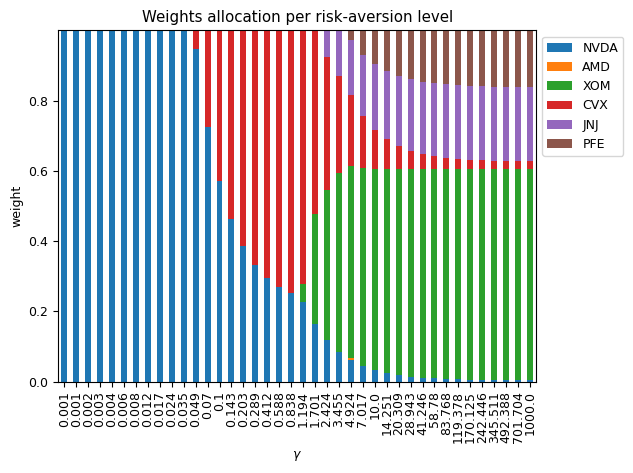

In [51]:
mystocks=['NVDA','AMD','XOM','CVX','JNJ','PFE']
weights_df = pd.DataFrame(weights_ef, 
                          columns=mystocks, 
                          index=np.round(gamma_range, 3))
ax = weights_df.plot(kind='bar', stacked=True) 
ax.set(title='Weights allocation per risk-aversion level',
       xlabel=r'$\gamma$', 
       ylabel='weight')
ax.legend(bbox_to_anchor=(1,1))

plt.tight_layout()

plt.show()

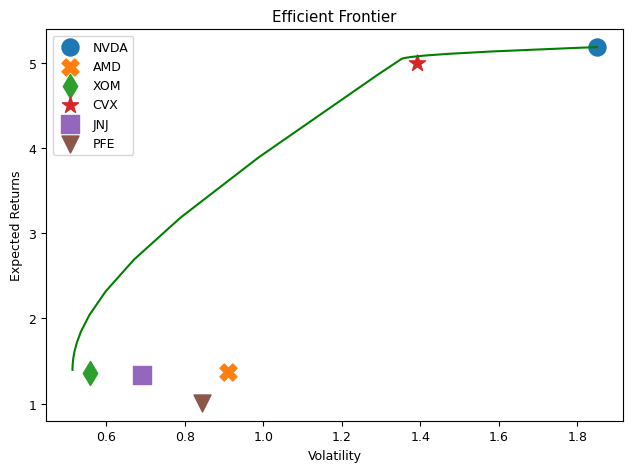

In [52]:
MARKS = ['o', 'X', 'd', '*', 's', 'v']

fig, ax = plt.subplots()
ax.plot(portf_vol_cvx_ef, portf_rtn_cvx_ef, 'g-')
for asset_index in range(len(mystocks)):
     plt.scatter(x=np.sqrt(cov_mat[asset_index, asset_index]), 
                 y=avg_returns[asset_index], 
                 marker=MARKS[asset_index], 
                 label=mystocks[asset_index],
                 s=150)
ax.set(title='Efficient Frontier',
       xlabel='Volatility', 
       ylabel='Expected Returns', )
ax.legend()

plt.tight_layout()

plt.show()